Input sequence, integers separateded by commas. Example: "1,2 ,3 , 5, 6". Or constant from maude script like "test64-seq" 1,2,3,4,5
Input Graph, arcs in format "1 or 2 or , 1 xor 3 or" where each node is represented by an integer and a function such as or, xor, seq, and second node following in the same format, all separated by spaces. Arcs separated by commas. Example: "1 or 2 or , 1 xor 3 or" or constant with graph from script, such as "graphLoop"
1 seq 2 or , 2 or 3 seq , 3 seq 4 seq , 4 seq 5 or, -5 seq 1 seq , 5 seq -7 seq
['1 seq 2 or ', ' 2 or 3 seq ', ' 3 seq 4 seq ', ' 4 seq 5 or', ' -5 seq 1 seq ', ' 5 seq -7 seq']
['1', 'seq', '2', 'or', '']
['1']
['1', 'seq']
['1', 'seq', '2']
['1', 'seq', '2', 'or']
['', '2', 'or', '3', 'seq', '']
['2']
['2', 'or']
['2', 'or', '3']
['2', 'or', '3', 'seq']
['', '3', 'seq', '4', 'seq', '']
['3']
['3', 'seq']
['3', 'seq', '4']
['3', 'seq', '4', 'seq']
['', '4', 'seq', '5', 'or']
['4']
['4', 'seq']
['4', 'seq', '5']
['4', 'seq', '5', 'or']
[''

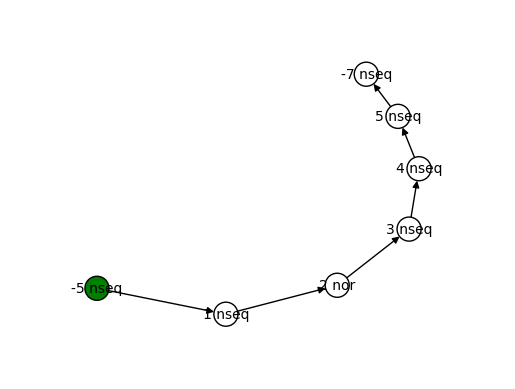


[1, 2, 3, 4, 5, -7]
{}
[]
[-5]
starting




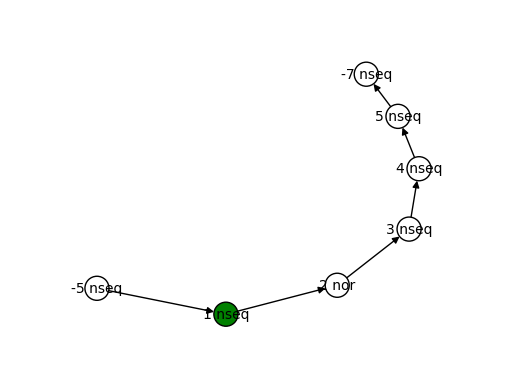


[2, 3, 4, 5, -7]
{}
[]
[-5, 1]
starting




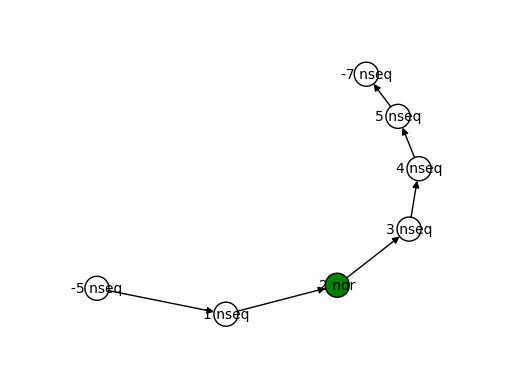


[3, 4, 5, -7]
{}
[]
[-5, 1, 2]
starting




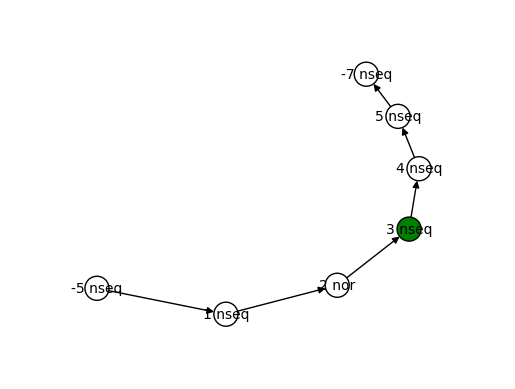


[4, 5, -7]
{}
[]
[-5, 1, 2, 3]
starting




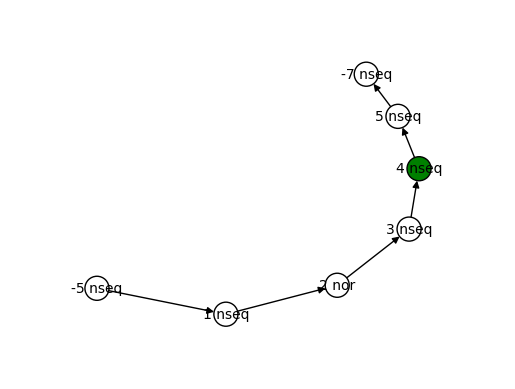


[5, -7]
{}
[]
[-5, 1, 2, 3, 4]
starting




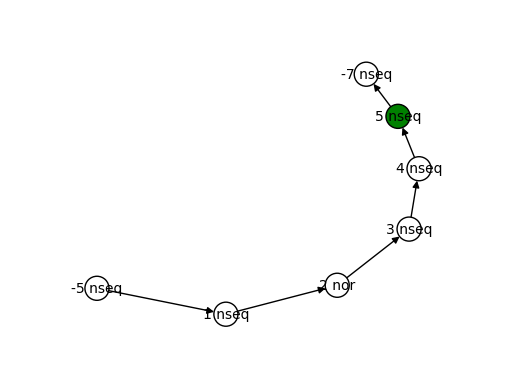


[-7]
{}
[]
[-5, 1, 2, 3, 4, 5]
starting




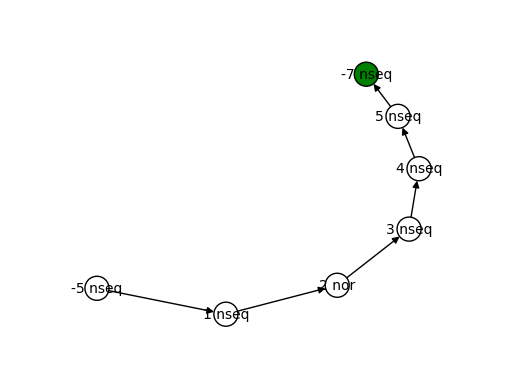


[]
{}
[]
[-5, 1, 2, 3, 4, 5, -7]
starting




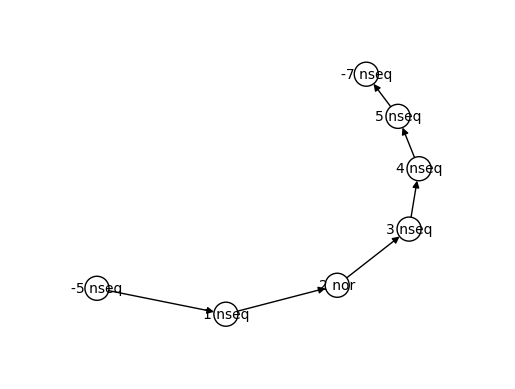


[]
{}
[]
[-5, 1, 2, 3, 4, 5, -7]
incorrectNo more solutions.states: 9  rewrites: 49 in 0ms cpu (0ms real) (~ rewrites/second)Bye.'




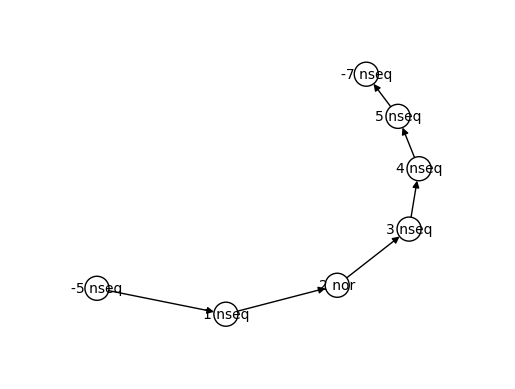

In [10]:
x = input('Input sequence, integers separateded by commas. Example: "1,2 ,3 , 5, 6". Or constant from maude script like "test64-seq" ')
y = input('Input Graph, arcs in format "1 or 2 or , 1 xor 3 or" where each node is represented by an integer and a function such as or, xor, seq, and second node following in the same format, all separated by spaces. Arcs separated by commas. Example: "1 or 2 or , 1 xor 3 or" or constant with graph from script, such as "graphLoop"\n')

x = sequencize(x)
y = graphize(y)

print()
print(x)
print(y)
print()

tryToPrint(run(x,y))
#tryToPrint(run("xorTestingSeq1","xorTestingGraph"))

#print(mistakeRate(x,y))


In [4]:
print(graphize(input()))

1 seq 2 or , 2 or 3 seq , 3 seq 4 seq , 4 seq 5 or
['1 seq 2 or ', ' 2 or 3 seq ', ' 3 seq 4 seq ', ' 4 seq 5 or']
['1', 'seq', '2', 'or', '']
['1']
['1', 'seq']
['1', 'seq', '2']
['1', 'seq', '2', 'or']
['', '2', 'or', '3', 'seq', '']
['2']
['2', 'or']
['2', 'or', '3']
['2', 'or', '3', 'seq']
['', '3', 'seq', '4', 'seq', '']
['3']
['3', 'seq']
['3', 'seq', '4']
['3', 'seq', '4', 'seq']
['', '4', 'seq', '5', 'or']
['4']
['4', 'seq']
['4', 'seq', '5']
['4', 'seq', '5', 'or']
 (n[1]: nseq, oth)->(n[2]: nor, oth);; (n[2]: nor, oth)->(n[3]: nseq, oth);; (n[3]: nseq, oth)->(n[4]: nseq, oth);; (n[4]: nseq, oth)->(n[5]: nor, oth)


In [11]:
def graphize(inputstring):
    if "," in inputstring:
        inputstring = inputstring.split(",")
        print(inputstring)
        outputstring = " "
        arc = ""
        for inputelement in inputstring:
            inputelementoutput = []
            inputelement = inputelement.split(" ")
            print(inputelement)
            for inputsubelement in inputelement:
                if " " in inputsubelement or ( len(inputsubelement) == 0 ):
                    randomvaluable = 1
                else:
                    inputelementoutput.append(inputsubelement)
                    print(inputelementoutput)
            if (len(inputelementoutput) == 4 ):
                outputstring = outputstring + """(n[""" + str(inputelementoutput[0]) + """]: n""" + str(inputelementoutput[1]) + """, oth)->(n[""" + str(inputelementoutput[2]) + """]: n""" + str(inputelementoutput[3]) + """, oth);; """
            else: 
                randomvaluable = 1
        return outputstring[:-3]
    else:
        return inputstring

( (a[2]); (a[3]); (a[4]); (a[5]); (a[7]); (a[6]); (a[8]); (a[7]); (a[8]); (a[3]); (a[5]); (a[4]); (a[6]); (a[8]); (a[7]); (a[8]); (a[9]) )

        (n[2]: nseq, start)->(n[3]: nxor, oth);;
(n[3]: nxor, oth)->(n[5]: nor, oth);;
(n[3]: nseq, oth)->(n[4]: nseq, oth);;
(n[4]: nseq, oth)->(n[6]: nor, oth);;
(n[5]: nor, oth)->(n[6]: nor, oth);;
(n[5]: nor, oth)->(n[7]: nor, oth);;
(n[6]: nor, oth)->(n[7]: nor, oth);;
(n[6]: nor, oth)->(n[8]: nand, oth);;
(n[7]: nor, oth)->(n[8]: nand, oth);;
(n[8]: nand, oth)->(n[3]: nxor, oth);;
(n[8]: nand, oth)->(n[9]: nseq, fin)
        
0.29411764705882354

[-5, 2, 3, 4, 5, 7, 6, 8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{}
[]
[]
starting




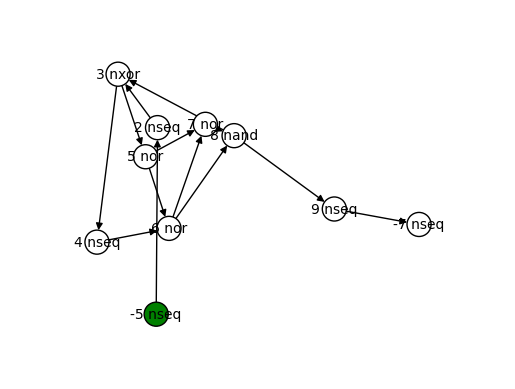

t(-5 & 1)
[2, 3, 4, 5, 7, 6, 8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1}
[-5]
[]
executing




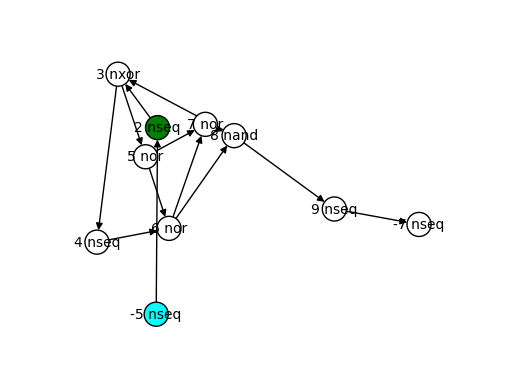

t(-5 & 1) & t(2 & 1)
[3, 4, 5, 7, 6, 8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1}
[-5, 2]
[]
executing




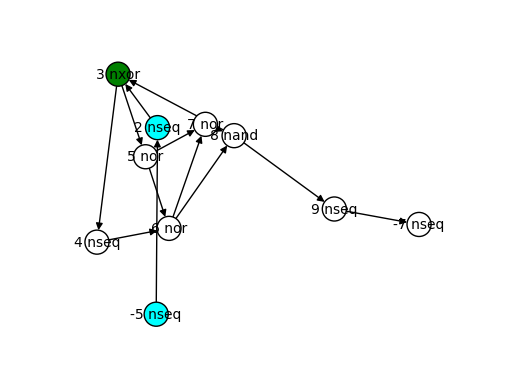

t(-5 & 1) & t(2 & 1) & t(3 & 1)
[4, 5, 7, 6, 8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: 1}
[-5, 2, 3]
[]
executing




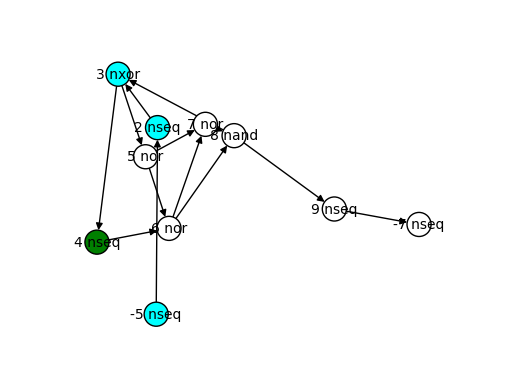

t(-5 & 1) & t(2 & 1) & t(3 & 1) & t(4 & 1) & t(3 & -1) & t(5 & -1)
[5, 7, 6, 8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: -1, 4: 1, 5: -1}
[-5, 2, 3, 4]
[]
executing




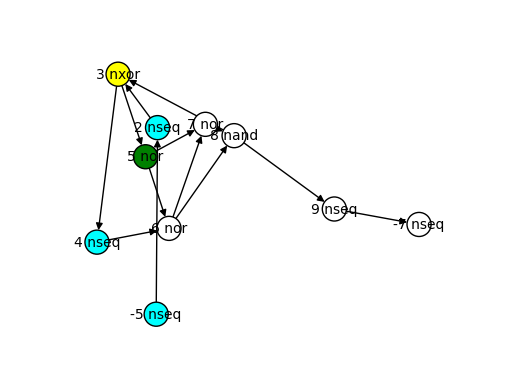

t(-5 & 1) & t(2 & 1) & t(3 & 1) & t(4 & 1) & t(3 & -1) & t(5 & -1)
[7, 6, 8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: -1, 4: 1, 5: -1}
[-5, 2, 3, 4]
[5]
executing




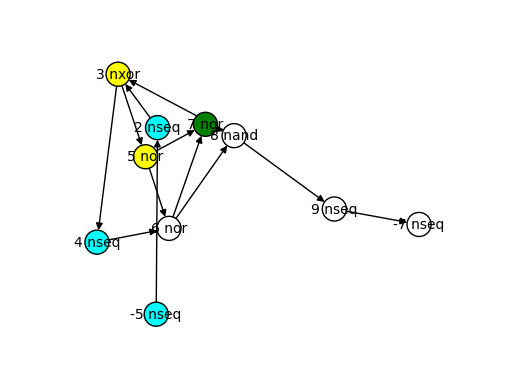

t(-5 & 1) & t(2 & 1) & t(3 & 1) & t(4 & 1) & t(3 & -1) & t(5 & -1)
[6, 8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: -1, 4: 1, 5: -1}
[-5, 2, 3, 4]
[5, 7]
executing




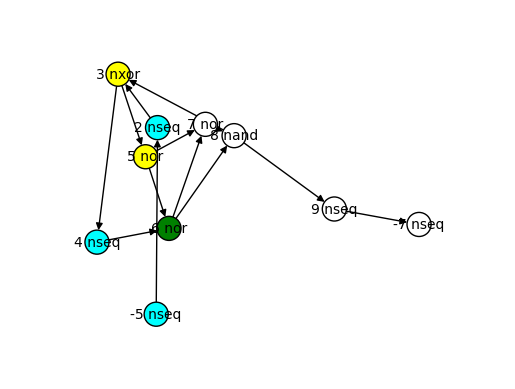

t(-5 & 1) & t(2 & 1) & t(3 & 1) & t(4 & 1) & t(3 & -1) & t(5 & -1)    & t(6 & 1)
[8, 7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1}
[-5, 2, 3, 4, 6]
[5, 7]
executing




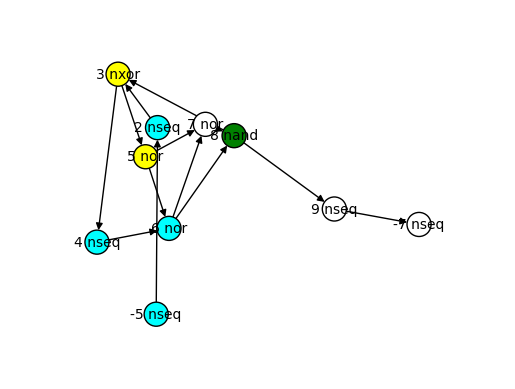

t(-5 & 1) & t(2 & 1) & t(3 & 1) & t(4 & 1) & t(3 & -1) & t(5 & -1)    & t(6 & 1)
[7, 8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1}
[-5, 2, 3, 4, 6]
[5, 7, 8]
executing




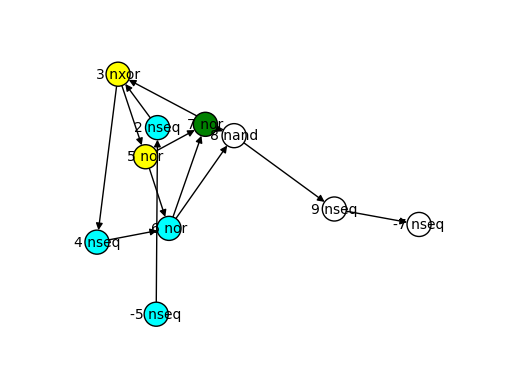

t(-5 & 1) & t(2 & 1) & t(3 & 1) & t(4 & 1) & t(3 & -1) & t(5 & -1)    & t(6 & 1) & t(7 & 1)
[8, 3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: 1}
[-5, 2, 3, 4, 6, 7]
[5, 7, 8]
executing




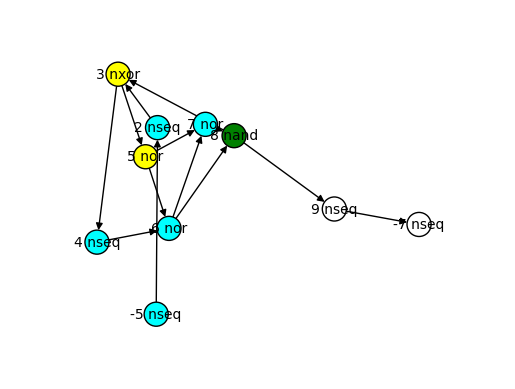

t(-5 & 1) & t(2 & 1) & t(3 & 1) & t(4 & 1) & t(3 & -1) & t(5 & -1)    & t(6 & 1) & t(7 & 1) & t(8 & 1)
[3, 5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: 1, 8: 1}
[-5, 2, 3, 4, 6, 7, 8]
[5, 7, 8]
executing




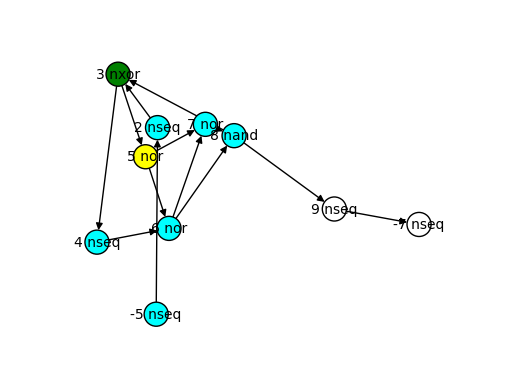

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1)
[5, 4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: 1, 5: -1}
[-5, 2, 3, 4, 6, 7, 8, 3]
[5, 7, 8]
executing




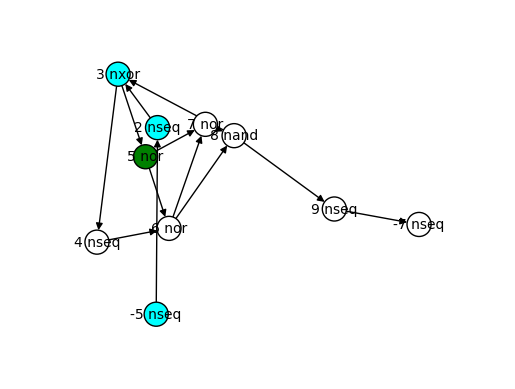

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1)
[4, 6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: 1, 5: -1}
[-5, 2, 3, 4, 6, 7, 8, 3]
[5, 7, 8, 5]
executing




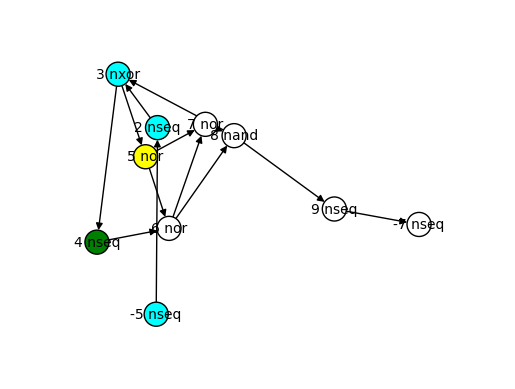

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)
[6, 8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4]
[5, 7, 8, 5]
executing




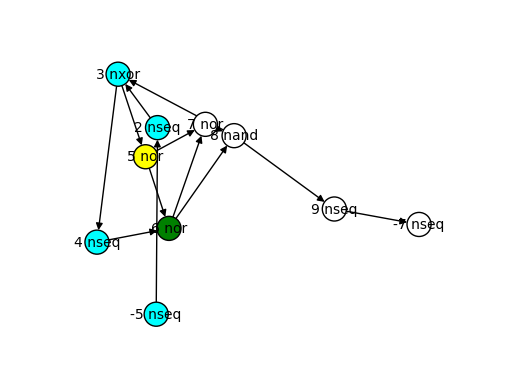

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)    & t(6 & 1)
[8, 7, 8, 9, -7]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1, 6: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4, 6]
[5, 7, 8, 5]
executing




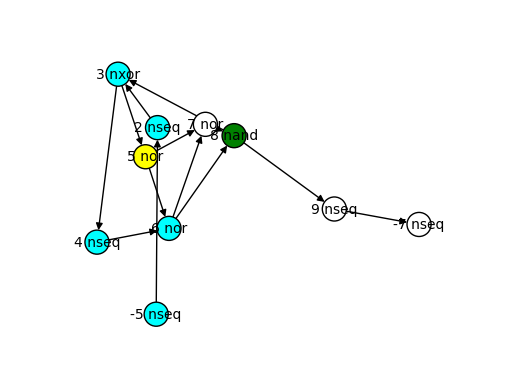

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)    & t(6 & 1)
[7, 8, 9, -7]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1, 6: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4, 6]
[5, 7, 8, 5, 8]
executing




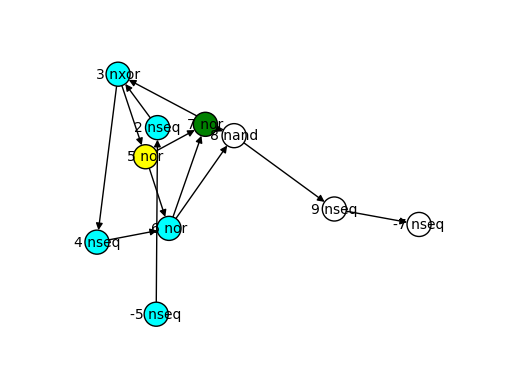

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)    & t(6 & 1) & t(7 & 1)
[8, 9, -7]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1, 6: 1, 7: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4, 6, 7]
[5, 7, 8, 5, 8]
executing




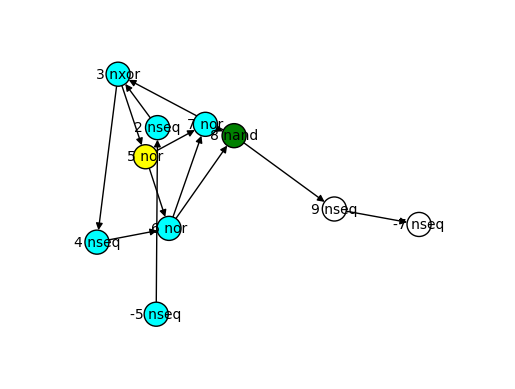

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)    & t(6 & 1) & t(7 & 1) & t(8 & 1)
[9, -7]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1, 6: 1, 7: 1, 8: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4, 6, 7, 8]
[5, 7, 8, 5, 8]
executing




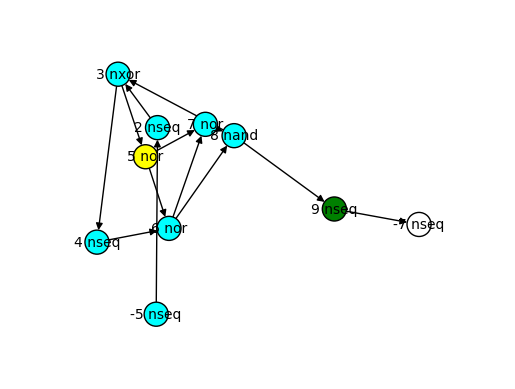

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)    & t(6 & 1) & t(7 & 1) & t(8 & 1) & t(9 & 1)
[-7]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1, 6: 1, 7: 1, 8: 1, 9: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4, 6, 7, 8, 9]
[5, 7, 8, 5, 8]
executing




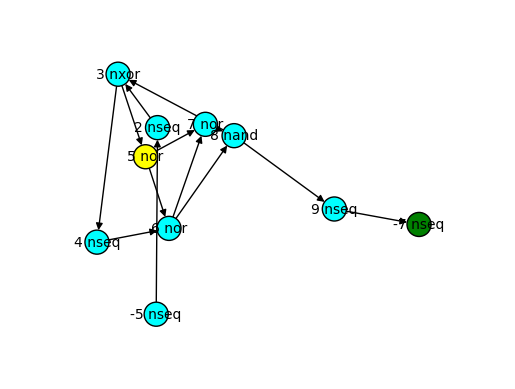

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)    & t(6 & 1) & t(7 & 1) & t(8 & 1) & t(9 & 1) & t(-7 & 1)
[]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1, 6: 1, 7: 1, 8: 1, 9: 1, -7: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4, 6, 7, 8, 9, -7]
[5, 7, 8, 5, 8]
executing




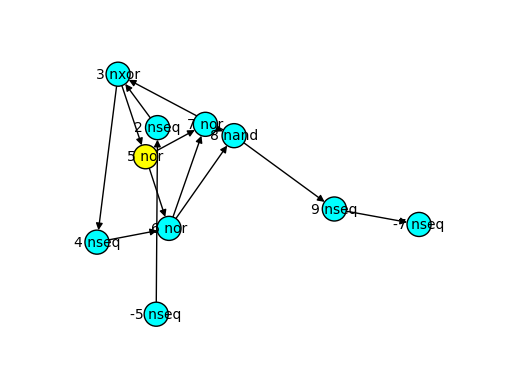

t(-5 & 1) & t(2 & 1) & t(3 & -1) & t(5 & -1) & t(3 & 1) & t(4 & 1)    & t(6 & 1) & t(7 & 1) & t(8 & 1) & t(9 & 1) & t(-7 & 1)
[]
{-5: 1, 2: 1, 3: 1, 5: -1, 4: 1, 6: 1, 7: 1, 8: 1, 9: 1, -7: 1}
[-5, 2, 3, 4, 6, 7, 8, 3, 4, 6, 7, 8, 9, -7]
[5, 7, 8, 5, 8]
correct




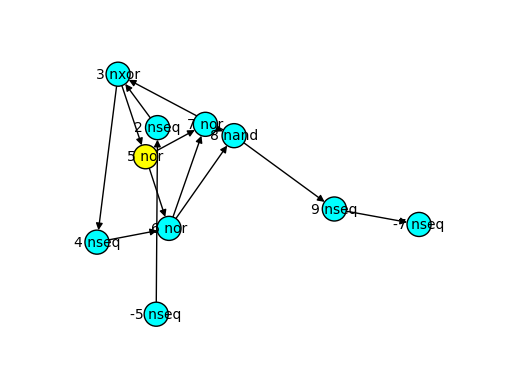

['\t\t     \\||||||||||||||||||/', '\t\t   --- Welcome to Maude ---', '\t\t     /||||||||||||||||||\\', '\t     Maude 3.2', '\t     Copyright 1997-2022 SRI International', '\t\t   Sun May 19 17:23:27 2024', '==========================================', 'search in GRAPH-RL : genCFG(a[2] ; a[3] ; a[4] ; a[5] ; a[7] ; a[6] ; a[8] ; a[', '    7] ; a[8] ; a[3] ; a[5] ; a[4] ; a[6] ; a[8] ; a[7] ; a[8] ; a[9], ((((((((', '    (n[8]: nand,oth -> n[3]: nxor,oth ;; n[8]: nand,oth -> n[9]: nseq,fin) ;;', '    n[7]: nor,oth -> n[8]: nand,oth) ;; n[6]: nor,oth -> n[8]: nand,oth) ;; n[', '    6]: nor,oth -> n[7]: nor,oth) ;; n[5]: nor,oth -> n[7]: nor,oth) ;; n[5]:', '    nor,oth -> n[6]: nor,oth) ;; n[4]: nseq,oth -> n[6]: nor,oth) ;; n[3]:', '    nseq,oth -> n[4]: nseq,oth) ;; n[3]: nxor,oth -> n[5]: nor,oth) ;; n[2]:', '    nseq,start -> n[3]: nxor,oth) =>* InputActionList | CookieT |', '    CorrectActionList | IncorrectActionList | G | Status .', '', 'Solution 1 (state 0)', 'states: 1  rewrites

In [2]:
#input graph for example


exampleSequence = convertSequenceToInput([" 2"," 3"," 4", " 5"," 7", " 6", " 8", " 7", " 8", " 3", " 5", " 4", " 6", " 8", " 7", " 8", " 9"])
print(exampleSequence)
print(graphExample)
print(mistakeRate(exampleSequence,graphExample))

tryToPrint(run(exampleSequence,graphExample))
print(run(exampleSequence,graphExample))


In [17]:
runSequencesWithGraph(graph1or)
runSequencesWithGraph(graph1and)
runSequencesWithGraph(graph1xor)
runSequencesWithGraph(graph2or)
runSequencesWithGraph(graph2and)
runSequencesWithGraph(graph2xor)
runSequencesWithGraph(graph3or)
runSequencesWithGraph(graph3and)
runSequencesWithGraph(graph3xor)

['1',
 '0.10344827586206896',
 '1',
 '0.15789473684210525',
 '0',
 '0.8888888888888888',
 '0',
 '0.7647058823529411',
 '1',
 '0.15789473684210525',
 '1',
 '0.15',
 '0',
 '1.0',
 '1',
 '0.15789473684210525',
 '1',
 '0.15789473684210525',
 '1',
 '0.15',
 '1',
 '0.0',
 '0',
 '0.9090909090909091',
 '1',
 '0.08333333333333333',
 '0',
 '0.9565217391304348',
 '1',
 '0.0',
 '0',
 '0.8888888888888888',
 '0',
 '0.8888888888888888',
 '1',
 '0.4444444444444444',
 '0',
 '0.9',
 '0',
 '0.8888888888888888',
 '0',
 '0.2222222222222222',
 '0',
 '1.0',
 '0',
 '1.0',
 '0',
 '1.0',
 '1',
 '0.15789473684210525',
 '0',
 '1.0',
 '0',
 '1.0',
 '0',
 '1.0',
 '0',
 '1.0',
 '0',
 '1.0',
 '1',
 '0.38461538461538464',
 '1',
 '0.1',
 '1',
 '0.09090909090909091',
 '0',
 '1.0',
 '1',
 '0.2',
 '1',
 '0.15789473684210525',
 '1',
 '0.2777777777777778',
 '1',
 '0.23809523809523808',
 '1',
 '0.15789473684210525']

In [26]:
v

Graph1 
Graph2 
Graph3 
1  &  1  &  0  &  1  &  0  &  1  &  10 \\
\hline
2  &  1  &  0  &  1  &  0  &  1  &  15 \\
\hline
3  &  0  &  88  &  0  &  88  &  0  &  88 \\
\hline
4  &  0  &  76  &  0  &  76  &  0  &  76 \\
\hline
5  &  1  &  0  &  1  &  0  &  1  &  15 \\
\hline
6  &  1  &  0  &  1  &  0  &  1  &  15 \\
\hline
7  &  0  &  100  &  0  &  100  &  0  &  100 \\
\hline
8  &  1  &  0  &  1  &  0  &  1  &  15 \\
\hline
9  &  1  &  0  &  1  &  0  &  1  &  15 \\
\hline
10  &  1  &  0  &  1  &  0  &  1  &  15 \\
\hline
11  &  1  &  13  &  1  &  0  &  1  &  0 \\
\hline
12  &  0  &  90  &  0  &  90  &  0  &  90 \\
\hline
13  &  1  &  25  &  1  &  8  &  1  &  8 \\
\hline
14  &  0  &  95  &  0  &  95  &  0  &  95 \\
\hline
15  &  1  &  17  &  1  &  0  &  1  &  0 \\
\hline
16  &  0  &  88  &  0  &  88  &  0  &  88 \\
\hline
17  &  0  &  88  &  0  &  88  &  0  &  88 \\
\hline
18  &  1  &  38  &  1  &  38  &  1  &  44 \\
\hline
19  &  0  &  90  &  0  &  90  &  0  &  90 \\
\hline
20  &  0  &  8

In [11]:
#CONFORMANCE CHECKING return the list of incorrect actions

print("Graph1 ")
seq1 = runSequencesWithGraphGetIncorrectActions(graph1or)
print("Graph2 ")
seq2 = runSequencesWithGraphGetIncorrectActions(graphBxor)
print("Graph3 ")
seq3 = runSequencesWithGraphGetIncorrectActions(graph3or)

print(seq1, seq2, seq3)

for n in range(0, (len(seq3)-1), 3):
    print( #            -------------------------- graph2or ---------------              ---------------- graphBxor -----------------------------       ---------------graph3or-------------------------------                              
        int((n/3)+1), " & ",seq1[n], " & ", str(float(seq1[n+1][:4])*100)[:-2] , " & " , seq1[n+2] , " & ", seq2[n], " & " , str(float(seq2[n+1][:4])*100)[:-2] , " & " , seq2[n+2] , " & " , seq3[n], " & " , str(float(seq3[n+1][:4])*100)[:-2] , " & " , seq1[n+2] , "\\\\")
    print("\hline")

Graph1 
Graph2 
Graph3 
['1', '0.0', [], '1', '0.0', [], '0', '0.8888888888888888', [2, 3, 6, 4, 2, 3, 6, 4, 2, 3, 6, 4, 2, 3, 6, 11, -7], '0', '0.7647058823529411', [2, 3, 6, 4, 2, 6, 4, 2, 3, 6, 4, 6, 11, -7], '1', '0.0', [], '1', '0.0', [], '0', '1.0', [5, 8, 2, 3, 6, 4, 8, 2, 3, 6, 2, 3, 6, 4, 2, 3, 6, 11, -7], '1', '0.0', [], '1', '0.0', [], '1', '0.0', [], '1', '0.13636363636363635', [9, 9, 9], '0', '0.9090909090909091', [2, 3, 6, 9, 4, 2, 3, 6, 9, 4, 2, 3, 6, 9, 4, 2, 3, 6, 9, 11, -7], '1', '0.25', [9, 9, 4, 2, 9, 9], '0', '0.9565217391304348', [4, 8, 2, 3, 6, 9, 4, 2, 3, 6, 9, 6, 2, 3, 6, 9, 4, 2, 3, 6, 9, 11, -7], '1', '0.17391304347826086', [9, 9, 9, 9], '0', '0.8888888888888888', [2, 3, 6, 4, 2, 3, 6, 4, 2, 3, 6, 4, 2, 3, 6, 11, -7], '0', '0.8888888888888888', [2, 3, 6, 4, 2, 3, 6, 4, 2, 3, 6, 4, 2, 3, 6, 11, -7], '1', '0.3888888888888889', [2, 3, 6, 4, 2, 3, 6], '0', '0.9', [2, 3, 6, 4, 2, 3, 6, 4, 2, 3, 6, 9, 6, 4, 2, 3, 6, 11, -7], '0', '0.8888888888888888', [2, 3, 6, 4, 

In [8]:
print("GraphBXOR ")
seq1 = runSequencesWithGraph(graph1or)
print("GraphBAND ")
seq2 = runSequencesWithGraph(graph2or)
seq3 = runSequencesWithGraph(graph3or)
print("GraphBAND ")
seq4 = runSequencesWithGraph(graphBxor)
seq5 = runSequencesWithGraph(graphBand)


for n in range(0, (len(seq2)-1), 2):
    print(int((n/2)+1), " & ",seq1[n], " & ", str(float(seq1[n+1][:4])*100)[:-2] , " & ", seq2[n], " & " , str(float(seq2[n+1][:4])*100)[:-2] , " & ", seq3[n], " & " , str(float(seq3[n+1][:4])*100)[:-2] , " & ", seq4[n], " & " , str(float(seq4[n+1][:4])*100)[:-2] , " & ", seq5[n], " & " , str(float(seq5[n+1][:4])*100)[:-2] ," \\\\")
    print("\hline")

GraphBXOR 
GraphBAND 
GraphBAND 
1  &  1  &  0  &  1  &  0  &  1  &  10  &  0  &  3  &  1  &  10  \\
\hline
2  &  1  &  0  &  1  &  0  &  1  &  15  &  0  &  5  &  1  &  15  \\
\hline
3  &  0  &  88  &  0  &  88  &  0  &  88  &  0  &  88  &  0  &  88  \\
\hline
4  &  0  &  76  &  0  &  76  &  0  &  76  &  0  &  76  &  0  &  76  \\
\hline
5  &  1  &  0  &  1  &  0  &  1  &  15  &  0  &  5  &  1  &  15  \\
\hline
6  &  1  &  0  &  1  &  0  &  1  &  15  &  0  &  5  &  1  &  15  \\
\hline
7  &  0  &  100  &  0  &  100  &  0  &  100  &  0  &  100  &  0  &  100  \\
\hline
8  &  1  &  0  &  1  &  0  &  1  &  15  &  0  &  5  &  1  &  15  \\
\hline
9  &  1  &  0  &  1  &  0  &  1  &  15  &  0  &  5  &  1  &  15  \\
\hline
10  &  1  &  0  &  1  &  0  &  1  &  15  &  0  &  5  &  1  &  15  \\
\hline
11  &  1  &  13  &  1  &  0  &  1  &  0  &  0  &  18  &  1  &  0  \\
\hline
12  &  0  &  90  &  0  &  90  &  0  &  90  &  0  &  90  &  0  &  90  \\
\hline
13  &  1  &  25  &  1  &  8  &  1  &  8  &  0  

In [1]:
import networkx as nx #oonly required for drawing graph
import matplotlib.pyplot as plt #only required for drawing graph
import csv




def runSequencesWithGraphGetIncorrectActions(graph):
    output = []
    for item in getSequences():
        #print(item)
        #print(convertSequenceToInput(item))
        #print('\n')
        #tryToPrint(run(convertSequenceToInput(item),graph))
        item = convertSequenceToInput(item)
        if isCorrect(item,graph):
            #print("1")
            output.append("1")
        if isIncorrect(item,graph):
            #print("0")
            output.append("0")
        #print(isCorrect(item,graph))
        #print(isIncorrect(item,graph))
        #print("Mistake rate: " + str(mistakeRate(item,graph)))
        output.append(str(mistakeRate(item,graph)))
        output.append(getIncorrect(item,graph))
    return output







def runSequencesWithGraph(graph):
    output = []
    for item in getSequences():
        #print(item)
        #print(convertSequenceToInput(item))
        #print('\n')
        #tryToPrint(run(convertSequenceToInput(item),graph))
        item = convertSequenceToInput(item)
        if isCorrect(item,graph):
            #print("1")
            output.append("1")
        if isIncorrect(item,graph):
            #print("0")
            output.append("0")
        #print(isCorrect(item,graph))
        #print(isIncorrect(item,graph))
        #print("Mistake rate: " + str(mistakeRate(item,graph)))
        output.append(str(mistakeRate(item,graph)))
    return output





def getIncorrect(sequence,graph):
    return returnFinalState(run(sequence,graph))[1]



def mistakeRate(sequence,graph):
    resultList = returnFinalState(run(sequence,graph))
    if -5 in resultList[0]:
        resultList[0].remove(-5)   
    if -5 in resultList[1]:
        resultList[1].remove(-5)
    if -7 in resultList[0]:
        resultList[0].remove(-7)   
    if -7 in resultList[1]:
        resultList[1].remove(-7)
    #print(resultList)
    return len(resultList[1])/(len(resultList[1]+resultList[0]))
    

def searchForCorrect(sequence,graph):
    command = """
    search genCFG( """ + sequence + """  , """ + graph +"""  ) =>* InputActionList | CookieT | CorrectActionList | IncorrectActionList | G | correct .
"""
    return command

def searchForInCorrect(sequence,graph):
    command = """
    search genCFG( """ + sequence + """  , """ + graph +"""  ) =>* InputActionList | CookieT | CorrectActionList | IncorrectActionList | G | incorrect .
"""
    return command


def returnFinalState(result):
    resultsstring = ""
    for i in result:
        resultsstring = resultsstring + i
    elem  = repr(resultsstring).split("Solution")[-1]
    #print(elem.split("InputActionList")[1].split("CookieT")[0][5:].replace("(nil).ActionList",""))
    inpSequence = sequenceToArray(elem.split("InputActionList")[1].split("CookieT")[0][5:].replace("(nil).ActionList",""))
    cookies = cookiesToDict(elem.split("CookieT")[1].split("CorrectActionList")[0][5:].replace("(nil).TupleList", ""))
    correctSequence = sequenceToArray(elem.split("CorrectActionList")[1].split("IncorrectActionList")[0][5:].replace("(nil).ActionList",""))
    incorrectSequence = sequenceToArray(elem.split("IncorrectActionList")[1].split("G")[0][5:].replace("(nil).ActionList",""))
        
    #print("Graph " + elem.split("G")[1].split("Status")[0][5:])
    if elem.split("Status")[1][5:6] == "c":
        status = elem.split("Status")[1][5:12]
    else:
            status = elem.split("Status")[1][5:]
    #print(inpSequence)
    #print(cookies)
    #print(correctSequence)
    #print(incorrectSequence)
    #print(status)
    #print('\n')
    return [correctSequence, incorrectSequence]

def isCorrect(x,y):
    #print(runSearchForCorrect(x,y))
    if "Solution 1" in "".join(runSearchForCorrect(x,y)):
        return True
    else:
        return False
    
def isIncorrect(x,y):
    #print(runSearchForInCorrect(x,y))
    if "Solution 1" in "".join(runSearchForInCorrect(x,y)):
        return True
    else:
        return False

def convertSequenceToInput(seqlist):
    seq = "( "
    for event in seqlist:
        seq = seq + "(a[" + event[1:] + "]); "
    seq = seq[:-2]
    seq = seq + " )"
    return(seq)

def getSequences():
    with open('suturing_file_sequences.csv') as csv_file:
        seqlist=[]
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            seqlist.append(row)
    #print(seqlist)
    return(seqlist)


def tryToPrint(inputstring):
    try:
        
        printGraphOutput(inputstring)
    except:
        try: 
            printSimpleOutput2(inputstring)
        except:
            printOutput(inputstring)
            
graphExample = """
        (n[2]: nseq, start)->(n[3]: nxor, oth);;
(n[3]: nxor, oth)->(n[5]: nor, oth);;
(n[3]: nseq, oth)->(n[4]: nseq, oth);;
(n[4]: nseq, oth)->(n[6]: nor, oth);;
(n[5]: nor, oth)->(n[6]: nor, oth);;
(n[5]: nor, oth)->(n[7]: nor, oth);;
(n[6]: nor, oth)->(n[7]: nor, oth);;
(n[6]: nor, oth)->(n[8]: nand, oth);;
(n[7]: nor, oth)->(n[8]: nand, oth);;
(n[8]: nand, oth)->(n[3]: nxor, oth);;
(n[8]: nand, oth)->(n[9]: nseq, fin)
        """
    
graph1or = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nor, oth);;
       (n[2]: nor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[4]: nseq, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nseq, oth)->(n[2]: nor, oth) """
       
graph2or = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nor, oth);;
       (n[2]: nor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[9]: nseq, oth);;
       (n[6]: nseq, oth)->(n[4]: nor, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nor, oth)->(n[2]: nor, oth);;
       (n[9]: nseq, oth)->(n[4]: nor, oth) """

graph3or = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nor, oth);;
       (n[2]: nor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[9]: nseq, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nseq, oth)->(n[2]: nor, oth);;
       (n[9]: nseq, oth)->(n[4]: nseq, oth) """


graph1and = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nand, oth);;
       (n[2]: nand, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[4]: nseq, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nseq, oth)->(n[2]: nand, oth) """
       
graph2and = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nand, oth);;
       (n[2]: nand, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[9]: nseq, oth);;
       (n[6]: nseq, oth)->(n[4]: nand, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nand, oth)->(n[2]: nand, oth);;
       (n[9]: nseq, oth)->(n[4]: nand, oth) """

graph3and = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nand, oth);;
       (n[2]: nand, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[9]: nseq, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nseq, oth)->(n[2]: nand, oth);;
       (n[9]: nseq, oth)->(n[4]: nseq, oth) """




graph1xor = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nxor, oth);;
       (n[2]: nxor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[4]: nseq, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nseq, oth)->(n[2]: nxor, oth) """
       
graph2xor = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nxor, oth);;
       (n[2]: nxor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[9]: nseq, oth);;
       (n[6]: nseq, oth)->(n[4]: nxor, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nxor, oth)->(n[2]: nxor, oth);;
       (n[9]: nseq, oth)->(n[4]: nxor, oth) """

graph3xor = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nxor, oth);;
       (n[2]: nxor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[9]: nseq, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nseq, oth)->(n[2]: nxor, oth);;
       (n[9]: nseq, oth)->(n[4]: nseq, oth) """

graphBxor = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nor, oth);;
       (n[2]: nor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nxor, oth);;
       (n[6]: nxor, oth)->(n[9]: nseq, oth);;
       (n[6]: nxor, oth)->(n[4]: nor, oth);;
       (n[6]: nxor, oth)->(n[11]: nseq, fin);;
       (n[4]: nor, oth)->(n[2]: nor, oth);;
       (n[9]: nseq, oth)->(n[4]: nor, oth) """

graphBand = """ (n[1]: nseq, start)->(n[5]: nseq, oth);;
       (n[5]: nseq, oth)->(n[8]: nseq, oth);;
       (n[8]: nseq, oth)->(n[2]: nor, oth);;
       (n[2]: nor, oth)->(n[3]: nseq, oth);;
       (n[3]: nseq, oth)->(n[6]: nseq, oth);;
       (n[6]: nseq, oth)->(n[9]: nseq, oth);;
       (n[6]: nseq, oth)->(n[4]: nand, oth);;
       (n[6]: nseq, oth)->(n[11]: nseq, fin);;
       (n[4]: nand, oth)->(n[2]: nor, oth);;
       (n[9]: nseq, oth)->(n[4]: nand, oth) """






def drawGraph(graphEdges, cookies, graphLabels, firstnode):
    G = nx.DiGraph()
    for edges in graphEdges:
        G.add_edge(edges[0] , edges[1])
    for labels in graphLabels:
        graphLabels[labels] = str(labels) + " " + graphLabels[labels]
    color_map = []
    for node in G:
        #print(node)
        if cookies.get(node) == 1 and (node != firstnode):
            color_map.append("cyan")
        elif cookies.get(node) == -1 and (node !=firstnode):
            color_map.append("yellow")
        elif node == firstnode:
            color_map.append("green")
        else:
            color_map.append("white")
    #print(color_map)

    # explicitly set positions
    #pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

    options = {
        "font_size": 10,
        "node_size": 300,
#        "node_color": "white",
        "edgecolors": "black",
 #       'arrowstyle': '-|>',
        "linewidths": 1,
        "width": 1,
    }
    pos = nx.spring_layout(G, seed=1)
    nx.draw_networkx(G, pos, labels=graphLabels, node_color=color_map , arrows=True, **options)

    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()

def graphToEdges(grapstring):
    listOfLists = []
    graphstring = grapstring.split(";;")
    ctr = 0
    for element in graphstring:
        templist = []
        #print(element)
        templist.append(int(element.strip().split("->")[0].strip().split("[")[1].split("]")[0]))
        templist.append(int(element.strip().split("->")[1].strip().split("[")[1].split("]")[0]))
        listOfLists.append(templist)
        #print(templist)
    return(listOfLists)    
    
    
def graphToLabels(graphstring):
    labelsDict = {}
    graphstring = graphstring.split(";;")
    for element in graphstring:
        labelsDict[(int(element.strip().split("->")[0].strip().split("[")[1].split("]")[0]))] = element.strip().split("->")[0].strip().split(":")[1].split(",")[0].strip()        
        labelsDict[(int(element.strip().split("->")[1].strip().split("[")[1].split("]")[0]))] = element.strip().split("->")[1].strip().split(":")[1].split(",")[0].strip()
    return(labelsDict)    
    
def sequenceToArray(stringsequence):
    stringsequence = stringsequence.strip()
    #print(stringsequence)
    stringsequence = stringsequence.split(";")
    newstringsequence = []
    for element in stringsequence:
        #print(element)
        if(len(element)>1):
            newstringsequence.append(int(element.split("[")[1].split("]")[0]))
        else:
            randomvalue = 1 #newstringsequence.append(element)
    return newstringsequence

def cookiesToDict(stringsequence):
    cookieDict = {}
    stringsequence = stringsequence.split("t")
    for element in stringsequence[1:]:
        #print(element)
        cookieDict[int(element.strip().split("&")[0][1:].strip())] = int(element.strip().split("&")[1].split(")")[0].strip())
    return cookieDict
    

def printSimpleOutput2(result):
    resultsstring = ""
    for i in result:
        resultsstring = resultsstring + i
    for elem in repr(resultsstring).split("Solution")[1:]:
        #print(elem.split("InputActionList")[1].split("CookieT")[0][5:].replace("(nil).ActionList",""))
        inpSequence = sequenceToArray(elem.split("InputActionList")[1].split("CookieT")[0][5:].replace("(nil).ActionList",""))
        cookies = cookiesToDict(elem.split("CookieT")[1].split("CorrectActionList")[0][5:].replace("(nil).TupleList", ""))
        correctSequence = sequenceToArray(elem.split("CorrectActionList")[1].split("IncorrectActionList")[0][5:].replace("(nil).ActionList",""))
        incorrectSequence = sequenceToArray(elem.split("IncorrectActionList")[1].split("G")[0][5:].replace("(nil).ActionList",""))
        
        #print("Graph " + elem.split("G")[1].split("Status")[0][5:])
        if elem.split("Status")[1][5:6] == "c":
            status = elem.split("Status")[1][5:12]
        else:
            status = elem.split("Status")[1][5:]
        print(inpSequence)
        print(cookies)
        print(correctSequence)
        print(incorrectSequence)
        print(status)
        print('\n')
        
def printGraphOutput(result):
    firstRun = True
    resultsstring = ""
    for i in result:
        resultsstring = resultsstring + i
    for elem in repr(resultsstring).split("Solution")[1:]:
        #print(elem.split("InputActionList")[1].split("CookieT")[0][5:].replace("(nil).ActionList",""))
        inpSequence = sequenceToArray(elem.split("InputActionList")[1].split("CookieT")[0][5:].replace("(nil).ActionList",""))
        cookies = cookiesToDict(elem.split("CookieT")[1].split("CorrectActionList")[0][5:].replace("(nil).TupleList", ""))
        correctSequence = sequenceToArray(elem.split("CorrectActionList")[1].split("IncorrectActionList")[0][5:].replace("(nil).ActionList",""))
        incorrectSequence = sequenceToArray(elem.split("IncorrectActionList")[1].split("G")[0][5:].replace("(nil).ActionList",""))
        graph =  elem.split("G")[1].split("Status")[0][5:]
        #print("Graph " + elem.split("G")[1].split("Status")[0][5:])
        print(elem.split("CookieT")[1].split("CorrectActionList")[0][5:].replace("(nil).TupleList", ""))
        edges = []
        labels = {}
        if firstRun:
            edges = graphToEdges(graph)
            labels = graphToLabels(graph)
        if elem.split("Status")[1][5:6] == "c":
            status = elem.split("Status")[1][5:12]
        else:
            status = elem.split("Status")[1][5:]
        print(inpSequence)
        print(cookies)
        print(correctSequence)
        print(incorrectSequence)
        print(status)
        print('\n')
        if len(inpSequence) > 0:
            firstNode = inpSequence[0]
        else:
            firstNode = -309
        drawGraph(graphToEdges(graph), cookies, labels, firstNode)

def sequencize(intlist):

    if "," in intlist:
        intlist = list(map(int, intlist.strip().split(",") ) ) 
        out = "( "
        for element in intlist:
            out = out + "a[" + str(element) + "] ; "
        out = out[:-2] + ")"
        return out
    else:
        return intlist
def graphize(inputstring):
    if "," in inputstring:
        inputstring = inputstring.split(",")
        #print(inputstring)
        outputstring = " "
        arc = ""
        for inputelement in inputstring:
            inputelementoutput = []
            inputelement = inputelement.split(" ")
            #print(inputelement)
            for inputsubelement in inputelement:
                if " " in inputsubelement or ( len(inputsubelement) == 0 ):
                    randomvaluable = 1
                else:
                    inputelementoutput.append(inputsubelement)
                    #print(inputelementoutput)
            if (len(inputelementoutput) == 4 ):
                outputstring = outputstring + """(n[""" + str(inputelementoutput[0]) + """]: n""" + str(inputelementoutput[1]) + """, start)->(n[""" + str(inputelementoutput[2]) + """]: n""" + str(inputelementoutput[3]) + """, start);; """
            else: 
                randomvaluable = 1
        return outputstring[:-3]
    else:
        return inputstring
        
        
        
        
        
def writeMaudeProgram() :
    f = open("graphCookies.maude", "w")
    f.write("""

*** Definition of Node types ***
fmod NTYPE is
  
  sort NType .
  ops nseq nand nor nxor : -> NType [ctor] .

endfm

*** Definition of Node function ***
fmod NFUNC is

  sort NFunc .
  ops start fin oth : -> NFunc [ctor] .

endfm

*** Definition of execution status ***
fmod STATUS is

  sort Status .
  ops starting correct incorrect executing  : -> Status [ctor] .

endfm

*** Definition of a Graph ***
fmod GRAPH is
  pr NAT .
  pr INT .
  pr STRING .
  pr NTYPE .
  pr NFUNC .
  pr STATUS .

  --- Definition of a Graph
  sort Graph .
  op nil : -> Graph [ctor] . --- There was no [ctor]
  op _;;_ : Graph Graph -> Graph [assoc comm id: nil prec 50 ] .

  *** A Graph is conformed by Arcs and Nodes ***
  --- Definition of a List of Nodes
  ---sort NodeList .
  ---subsort NodeList < Graph . --- List of Nodes should be part of Graph
  ---op nil : -> NodeList [ctor] . --- Definition of List of Nodes. There was no [ctor]
  ---op _;_ : NodeList NodeList -> NodeList [assoc id: nil] .

  --- Definition of Nodes
  sort Node .
  ---subsort Node < Graph .
  op (n[_]:_,_) : Int NType NFunc -> Node [ctor prec 30] . --- Definition of Node. Has Id and Type

  --- Definition of Arcs
  sort Arc .
  subsort Arc < Graph .
 --- op arcnil : -> Arc .
  op _->_ : Node Node -> Arc [ctor prec 30] . --- Definition of Arc. Unites two nodes.


  --- Definition of actions
  sort Action .
  subsort Action < ActionList . --- List of Nodes should be part of Graph
  op (a[_]) : Int -> Action [ctor prec 30] . --- Definition of Action. Has Id

  --- Definition of a List of Actions
  sort ActionList .
  subsort ActionList < Graph . --- List of Nodes should be part of Graph
  op nil : -> ActionList [ctor] . --- Definition of List of Nodes. There was no [ctor] --- it was returning an error
  op _;_ : ActionList ActionList -> ActionList [assoc id: nil] .


  --- 
  sort Cookie .
  subsort Cookie < CookieList .
  op (c[_,_]) : Int Int -> Cookie [ctor prec 30] .

  ---
  sort CookieList .
  subsort CookieList < Graph .
  op clnil : -> CookieList [ctor] .
  op _;_ : CookieList CookieList -> CookieList [assoc id: nil] .
  
  ----sort ActiveCookieList .
  
  
  var i j x y z : Int .
  var tuple1 tuple2 tuple3 : Tuple .
  var TList TList1 TList2 TList3 : TupleList .
  var AList1 : ActionList .
  
  sort Tuple .
  subsort Tuple < TupleList .
  op t(_&_) : Int Int -> Tuple [ctor] .

  sort TupleList .
  op nil : -> TupleList [ctor] .
  op _&_ : TupleList TupleList -> TupleList [assoc id: nil] .
  
  op firstAction : ActionList -> Action .  --- this one is being used 
  eq firstAction( ( a[i] ; AList1 ) ) = a[i] .
  
  op firstActionInt : ActionList -> Int .  --- this one is being used too
  eq firstActionInt( ( a[i] ; AList1 ) ) = i .
  
endfm

*** Pre-defined graphs and sequences ***
fmod SEQUENCES is
  pr GRAPH .

  *** Graph configurations for testing ***
  --- Sequential graph
  op graph1 : -> Graph .
  eq graph1 = 
  	(n[0]: nseq, start)->(n[1]: nseq, oth);;
    (n[1]: nseq, oth)->(n[2]: nseq, oth);;
    (n[2]: nseq, oth)->(n[11]: nseq, fin) .

  --- Sequential graph
  op graph2 : -> Graph .
  eq graph2 = 
  	(n[0]: nseq, start)->(n[1]: nseq, oth);;
    (n[1]: nseq, oth)->(n[2]: nseq, oth);;
    (n[1]: nseq, oth)->(n[3]: nseq, oth);;
    (n[2]: nseq, oth)->(n[4]: nseq, oth);;
    (n[3]: nseq, oth)->(n[4]: nseq, oth);;
    (n[4]: nseq, oth)->(n[11]: nseq, fin) .
    
      --- Sequential graph
  op graphLoop : -> Graph .
  eq graphLoop = 
  	(n[0]: nseq, start)->(n[1]: nseq, oth);;
    (n[1]: nseq, oth)->(n[2]: nseq, oth);;
    (n[1]: nseq, oth)->(n[3]: nseq, oth);;
    (n[2]: nseq, oth)->(n[4]: nseq, oth);;
    (n[3]: nseq, oth)->(n[4]: nseq, oth);;
    (n[4]: nseq, oth)->(n[5]: nseq, oth);;
    (n[5]: nseq, oth)->(n[6]: nseq, oth);;
    (n[6]: nseq, oth)->(n[11]: nseq, fin);;
    (n[5]: nseq, oth)->(n[1]: nseq, oth) .
  
  
  --- And graph
  op graph3 : -> Graph .
  eq graph3 = 
  	(n[0]: nseq, start)->(n[1]: nseq, oth);;
    (n[1]: nseq, oth)->(n[2]: nseq, oth);;
    (n[1]: nseq, oth)->(n[3]: nseq, oth);;
    (n[2]: nseq, oth)->(n[4]: nand, oth);;
    (n[3]: nseq, oth)->(n[4]: nand, oth);;
    (n[4]: nand, oth)->(n[11]: nseq, fin) .

  --- Or graph
  op graph4 : -> Graph .
  eq graph4 = 
  	(n[0]: nseq, start)->(n[1]: nseq, oth);;
    (n[1]: nseq, oth)->(n[2]: nseq, oth);;
    (n[1]: nseq, oth)->(n[3]: nseq, oth);;
    (n[2]: nseq, oth)->(n[4]: nor, oth);;
    (n[3]: nseq, oth)->(n[4]: nor, oth);;
    (n[4]: nor, oth)->(n[11]: nseq, fin) .

  --- Xor graph
  op graph5 : -> Graph .
  eq graph5 = 
  	(n[0]: nseq, oth)->(n[1]: nxor, oth);;
    (n[1]: nxor, oth)->(n[2]: nseq, oth);;
    (n[1]: nxor, oth)->(n[3]: nseq, oth);;
    (n[2]: nseq, oth)->(n[4]: nseq, oth);;
    (n[3]: nseq, oth)->(n[4]: nseq, oth);;
    (n[4]: nseq, oth)->(n[11]: nseq, fin) .
    
  op graph51 : -> Graph .
  eq graph51 = 
  	(n[0]: nseq, oth)->(n[1]: nseq, oth);;
    (n[1]: nseq, oth)->(n[2]: nxor, oth);;
    (n[1]: nseq, oth)->(n[3]: nseq, oth);;
    (n[2]: nxor, oth)->(n[4]: nseq, oth);;
    (n[3]: nseq, oth)->(n[2]: nxor, oth);;
    (n[3]: nseq, oth)->(n[4]: nseq, oth);;
    (n[4]: nseq, oth)->(n[11]: nseq, oth) .
    
  op smallLoopGraph : -> Graph .
  eq smallLoopGraph = 
    (n[0]: nseq, start)->(n[1]: nor, oth);;
    (n[1]: nor, oth)->(n[2]: nseq, oth);;
    (n[2]: nseq, oth)->(n[1]: nor, oth);;
    (n[2]: nseq, oth)->(n[11]: nseq, fin) .
    
  op multiLoopGraph : -> Graph .
  eq multiLoopGraph =
  	(n[0]: nseq, start)->(n[1]: nseq, oth);;
    (n[1]: nseq, oth)->(n[2]: nseq, oth);;
    (n[1]: nseq, oth)->(n[3]: nor, oth);;
    (n[2]: nseq, oth)->(n[4]: nseq, oth);;
    (n[3]: nor, oth)->(n[4]: nseq, oth);;
    (n[4]: nseq, oth)->(n[5]: nseq, oth);;
    (n[5]: nseq, oth)->(n[6]: nor, oth);;
    (n[6]: nor, oth)->(n[11]: nseq, fin);;
    (n[5]: nseq, oth)->(n[1]: nseq, oth);;
    (n[6]: nor, oth)->(n[8]: nseq, oth);;
    (n[8]: nseq, oth)->(n[9]: nseq, oth);;
    (n[9]: nseq, oth)->(n[6]: nor, oth);;
    (n[8]: nseq, oth)->(n[3]: nor, oth) .
    
  op xorTestingGraph : -> Graph .
  eq xorTestingGraph = (n[1]: nseq, start) -> (n[2]: nseq, oth);;
    (n[2]: nseq, oth) -> (n[3]: nxor, oth);;
    (n[3]: nxor, oth) -> (n[4]: nseq, oth);;
    (n[3]: nxor, oth) -> (n[5]: nseq, oth);;
    (n[5]: nseq, oth) -> (n[6]: nor, oth);;
    (n[4]: nseq, oth) -> (n[6]: nor, oth);;
    (n[6]: nor, oth) -> (n[7]: nseq, fin);;
    (n[6]: nor, oth) -> (n[2]: nseq, oth) .
    
  
  *** Action sequences for testing ***
  
  op xorTestingSeq1 : -> ActionList .
  eq xorTestingSeq1 = (a[1]) ; (a[2]) ; (a[3]) ; (a[4]) ; (a[5]) ; (a[6]) ; (a[2]) ; (a[3]) ; (a[5]) ; (a[4]) ; (a[6]) ; (a[7]) .
  
  op seq1 : -> ActionList .
  eq seq1 = (a[0]) ; (a[1]) ; (a[2]) ; (a[11]) .

  op seq2 : -> ActionList .
  eq seq2 = (a[0]) ; (a[1]) ; (a[11]) .

  op seq3 : -> ActionList .
  eq seq3 = (a[0]) ; (a[1]) ; (a[2]) ; (a[3]) ; (a[4]) ; (a[11]) .

  op seq4 : -> ActionList .
  eq seq4 = (a[0]) ; (a[1]) ; (a[2]) ; (a[4]) ; (a[11]) .
  
  op seqSimpleLoop : -> ActionList . 
  eq seqSimpleLoop = (a[-1] ; a[0] ; a[1] ; a[2] ; a[4] ; a[5] ; a[1] ; a[2] ; a[5] ; a[6] ; a[4] ; a[5] ; a[2] ; a[3] ; a[1] ; a[3] ; a[4] ; a[5] ; a[6] ; a[11]) .

  op smallLoopSeq : -> ActionList .
  eq smallLoopSeq = (a[0] ; a[1] ; a[2] ; a[1] ; a[2] ; a[11]) .
  
  op multiLoopSeq : -> ActionList .
  eq multiLoopSeq = ( a[0] ; a[1] ; a[2] ; a[4] ; a[5] ; a[6] ; a[8] ; a[3] ; a[4] ; a[9] ; a[4] ; a[5] ; a[6] ; a[8] ; a[9] ; a[6] ; a[11] ) .
  
  
  op test64-seq : -> ActionList .
  eq test64-seq = ( a[0] ; a[1] ; a[2] ; a[4] ; a[5] ; a[6] ; a[4] ; a[5] ; a[6] ; a[11] ) .
  
  
endfm

*** Initial configurations ***
fmod CONFIG is
  pr SEQUENCES .

  sort Config .
  op _|_|_|_|_|_ : ActionList TupleList ActionList ActionList Graph Status -> Config [ctor] . --- input actionlist, cookielist, correct actionlist, incorrect actiounlist, graph, status
  
  *** Variables ***
  var AList CList EList InputActionList : ActionList .
  var Cookies : CookieList .
  var TupleCookies TList1 : TupleList .
  var G : Graph .
  var type : NType .
  var func : NFunc .
  var i : Int .

  *** Initial configurations using simple actions and graphs ***
  
  op simpleLoopTest : -> Config .
  eq simpleLoopTest = 
    smallLoopSeq |
    nil |
    nil |
    nil |
    smallLoopGraph |
    starting .

  op testxorfalse : -> Config .
  eq testxorfalse =
  	seq3 |
    nil |
    nil |
    nil |
    graph5 |
    starting .
    
  op testxortrue : -> Config .
  eq testxortrue =
  	seq3 |
    nil |
    nil |
    nil |
    graph51 |
    starting .

  op testandtrue : -> Config .
  eq testandtrue =
	seq3 |
	nil |
	nil |
	nil |
	graph3 |
	starting .

  op test-start : -> Config .
  eq test-start =
  	(a[1]) ; (a[2])   |
    nil | 
    nil |
    nil |
    ( (n[4]: nseq, oth) -> (n[6]: nseq, oth) ;; (n[1]: nseq, start) -> (n[2]: nseq, oth) ;; (n[2]: nseq, oth) -> (n[3]: nseq, oth) ) |
	starting .
    
    
  op test-start-end : -> Config .
  eq test-start-end =
  	(a[1]) ; (a[2]) |
    nil | 
    nil |
    nil |
    ( (n[1]: nseq, start) -> (n[2]: nseq, fin) ) |
	starting .


  *** Initial configurations using simple actions and graphs ***
  --- Sequential nodes (with artificial S and F nodes in a correct sequence)
  op init-simple-correct : -> Config .
  eq init-simple-correct = 
    seq3 | 
    nil | 
    nil |
    nil |
    graph2 |
    starting .
    
  op test-simple-loop : -> Config .
  eq test-simple-loop = 
  	seqSimpleLoop | 
    nil |
    nil |
    nil |
    graphLoop |
    starting .
    
  op test64 : -> Config .
  eq test64 =
    test64-seq |
    nil |
    nil |
    nil |
    graphLoop |
    starting .
    

  op test-tuple-list : -> TupleList .
  eq test-tuple-list = ( t( 2 & 1 ) & t( 4 & 1 ) & t( 3 & 1 ) & t( 1 & 1 ) & t( 5 & 1 ) & t( 6 & 1 ) & t( 7 & 1 ) & t( 8 & 1 ) & t( 9 & 1 ) ) .


endfm

fmod GRAPH-EQ is
  pr CONFIG .
  pr EXT-BOOL .

  *** Variables ***
  var AList AList' AList1 AList2 InputActionList : ActionList . --- Lists of user actions
  var Cookies Cookies' Cookies1 Cookies2 : CookieList . --- Lists of cookies
  var TupleCookies TupleCookies' TupleCookies1 TupleCookies2 : TupleList . --- Lists of Tuple
  var CList CList' CList1 CList2 : ActionList . --- Lists of correct actions
  var EList EList' EList1 EList2 : ActionList . --- Lists of incorrect actions
  var G G' G1 G2 : Graph . --- Graphs
  var type type' type1 type2 type3 : NType . --- Node types
  var func func' func1 func2 func3 : NFunc . --- Node functions
  var i j x y z c n : Int . --- Node ids
  var status status' : Status . --- Status of the execution
  var tuple1 tuple2 tuple3 tuple4 : Tuple . --- tuple variables
  var TList TList1 TList2 TList3 TList4 : TupleList . --- tuple list
  var Action Action1 Action2 : Action .
  var Bool1 Bool2 Bool3 Bool4 : Bool .
  var Node1 Node2 Node3 : Node .

  *** Equations ***
  --- Check if last node of Correct List is "fin" node and cookies only contains final node
  op checkStatus : CookieList ActionList Graph -> Bool .
  eq checkStatus(nil, nil, G) = false .
  eq checkStatus((a[i]), (CList ; (a[i])), G ;; (n[x]: type', func') -> (n[i]: type, func)) = 
    if func == fin
    then true
    else false
    fi .

  --- Check if node is type "sequential", "and", "or" or "xor"
  op checkType : Action Graph -> String .
  eq checkType((a[i]), (n[x]: type', func') -> (n[i]: type, func) ;; G) =
    if type == nand
    then "and"
    else 
      if type == nor
      then "or"
      else
        if type == nxor
        then "xor"
        else "seq"
        fi
      fi
    fi .
    
  op isStartingNode : Action Graph -> Bool . 
  eq isStartingNode( a[i] , G1 ;; (n[i]: type', func') -> (n[x]: type, func) ;; G2  ) = 
  	if func' == start
    then true
    else false
    fi .
  eq isStartingNode( Action1, G) = false [owise] .
    
  --- get action function
  op checkFunc : Action Graph -> String .
  eq checkFunc((a[i]), (n[x]: type', func') -> (n[i]: type, func) ;; G) =
    if func == start
    then "start"
    else 
      if func == fin
      then "fin"
      else "oth"
      fi
    fi .



  --- Check if requirements for "and" are met
  op isAnd : Action Graph -> Bool .
  eq isAnd((a[i]), G) =
    if checkType((a[i]), G) == "and" 
    then true
    else false
    fi .

  --- Check if requirements for "or" are met
  op isOr : Action Graph -> Bool .
  eq isOr((a[i]), G) =
    if checkType((a[i]), G) == "or"
    then true
    else false
    fi .

  --- Check if requirements for "xor" are met
  op isXor : Action Graph -> Bool .
  eq isXor((a[i]), G) =
    if checkType((a[i]), G) == "xor"
    then true
    else false
    fi .

  --- Check if requirements for "seq" are met
  op isSeq : Action Graph -> Bool .
  eq isSeq((a[i]), G) =
    if checkType((a[i]), G) == "seq"
    then true
    else false
    fi .
    


  --- Consume cookies from list
  op consume : CookieList CookieList -> CookieList .
  eq consume(Cookies1, nil) = nil .
  eq consume(((c[x,y]) ; AList), Cookies) = 
    if (c[x,y]) in Cookies
    then (c[x,y]) ; consume(AList, Cookies)
    else consume(AList, Cookies)
    fi .

  --- Add cookies to list
  op add : ActionList ActionList -> ActionList .
  eq add(AList, nil) = nil .
  eq add(((a[x]) ; AList), Cookies) = 
    if (a[x]) in Cookies
    then (a[x]) ; consume(AList, Cookies)
    else add(AList, Cookies)
    fi .

  --- Return how many parents are in list of correct actions
  op checkParentsInList : Action ActionList ActionList Graph -> String .
  eq checkParentsInList((a[i]), Cookies, CList, G) =
    if allActionsListInList(parents((a[i]), G), CList) == true and allActionsListInList(parents((a[i]), G), Cookies) == true
    then 
      "all"
    else 
      if oneActionListInList(parents((a[i]), G), CList) == true and oneActionListInList(parents((a[i]), G), Cookies) == true
      then "one"
      else 
        if someActionsListInList(parents((a[i]), G), CList) == true and someActionsListInList(parents((a[i]), G), Cookies) == true
        then "some"
        else "none"
        fi
      fi
    fi .
  
  --- Check if all nodes are in the target list of nodes
  op allActionsListInList : ActionList ActionList -> Bool .
  eq allActionsListInList(nil, CList) = true .
  eq allActionsListInList(((a[x]) ; AList), CList) =
    ((a[x]) in CList) and allActionsListInList(AList, CList) .
  
  --- Check if at least one of the nodes is in the target list of nodes
  op someActionsListInList : ActionList ActionList -> Bool .
  eq someActionsListInList(nil, CList) = false .
  eq someActionsListInList(((a[x]) ; AList), CList) =
    ((a[x]) in CList) or someActionsListInList(AList, CList) .

  --- Check if only one one of the nodes is in the target list of nodes
  op oneActionListInList : ActionList ActionList -> Bool .
  eq oneActionListInList(nil, CList) = false .
  eq oneActionListInList(((a[x]) ; AList), CList) =
    ((a[x]) in CList) xor oneActionListInList(AList, CList) .

  *** Auxiliary equations ***
  --- To obtain the list of direct parents of a node in a graph. -- returns parents
  op parents : Action Graph -> ActionList .
  eq parents((a[i]), (n[x]: type1, func1) -> (n[i]: type, func) ;; G) =
    (a[x]) ; parents((a[i]), G) .
  eq parents((a[i]), G) = nil [owise] .

  --- To obtain the list of direct children of a node in a graph.
  op children : Action Graph -> ActionList .
  eq children((a[i]), (n[i]: type, func) -> (n[x]: type', func') ;; G) =
    (a[x]) ; children((a[i]), G) .
  eq children((a[i]), G) = nil [owise] .
  
  op listChildren : ActionList Graph -> ActionList . 
  eq listChildren( ( Action ; AList1 ) , G ) = ( ( children(Action, G) ) ; listChildren( AList1 , G ) ) .
  eq listChildren( nil, G ) = nil .
   
  op _in_ : Action ActionList -> Bool .
  eq (a[i]) in (AList1 ; (a[i]) ; AList2) = true .
  eq (a[i]) in AList1 = false [owise] .
  
  op tupleInTupleList : Tuple TupleList -> Bool .
  eq tupleInTupleList( ( t( x & y ) ) , ( t( z & i) & TList1 ) ) = 
  if ( x == z ) and ( y == i ) then true
  else tupleInTupleList( ( t( x & y ) ) , TList1)
  fi .
  eq tupleInTupleList(tuple2, TList2) = false [owise] .


  op removeTupleFromTupleList : Tuple TupleList -> TupleList .
  eq removeTupleFromTupleList( tuple1 , ( TList1 & tuple1 & TList2 ) ) = ( TList1 & TList2 ) .
  
  ---op activateCookie : Int TupleList -> TupleList .
  ---eq activateCookie( x , TList ) = activateCookieTuple
  
  --- activates cookie if not already active
  op activateCookie : Int TupleList -> TupleList .
  eq activateCookie( x , TList ) = 
  if tupleInTupleList( t( x & 1 ) , TList ) then 
    TList
    else ( ( TList & t( x & 1 ) ) )
    fi .
    
  op blockCookie : Int TupleList -> TupleList .
  eq blockCookie( x , TList ) = 
  if tupleInTupleList( t( x & -1 ) , TList ) then 
    TList
    else ( ( TList & t( x & -1 ) ) )
    fi .
   
  op blockActionCookie : Action TupleList -> TupleList .
  eq blockActionCookie( a[i] , TList ) = 
  if tupleInTupleList( t( i & -1 ) , TList ) then 
    TList
    else ( ( TList & t( i & -1 ) ) )
    fi .
    
  op isCookieActive : Int TupleList -> Bool .
  eq isCookieActive( x , TList ) =
  if tupleInTupleList ( t( x & 1 ) , TList ) then true
  else false
  fi .
  
  op isCookieBlocked : Int TupleList -> Bool .
  eq isCookieBlocked( x , TList ) =
  if tupleInTupleList ( t( x & -1 ) , TList ) then true
  else false
  fi .
  
  
  
  op deactivateCookie : Int TupleList -> TupleList .
  eq deactivateCookie( x , TList ) = 
  if tupleInTupleList( ( t( x & 1 ) ) , TList ) then removeTupleFromTupleList( t( x & 1 )  , TList )
  else TList 
  fi .
  
  
  op unblockCookie : Int TupleList -> TupleList .
  eq unblockCookie( x , TList ) = 
  if tupleInTupleList( ( t( x & -1 ) ) , TList ) then removeTupleFromTupleList( t( x & -1 )  , TList )
  else TList 
  fi .
  
  
  --- deactivate cookies in the first list in the scond list
  op deactivateCookieList : TupleList TupleList -> TupleList .
  eq deactivateCookieList( ( ( t( x & 1) & ( TList1 ) ) ) , ( TList ) ) = deactivateCookieList( TList1 , deactivateCookie( x , TList ) ) . 
  eq deactivateCookieList( nil , TList ) = TList .
  
  op unblockCookieList : TupleList TupleList -> TupleList .
  eq unblockCookieList( ( ( t( x & -1) & ( TList1 ) ) ) , ( TList ) ) = deactivateCookieList( TList1 , deactivateCookie( x , TList ) ) . 
  eq unblockCookieList( nil , TList ) = TList .
  
  --- MAIN function to use with rules
  ---seems to work, deactivates ACTION LIST from COOKIE LIST and returns COOKIE LIST
  op deactivateActionCookies : ActionList TupleList -> TupleList .
  eq deactivateActionCookies( ( a[x] ; AList1 ) , TList ) = deactivateActionCookies(AList1 , deactivateCookie(x, TList)) .
  eq deactivateActionCookies( nil , TList ) = TList .
  
  
  --- MAIN function to use with rules
  ---seems to work, unblocks ACTION LIST from COOKIE LIST and returns COOKIE LIST
  op unblockActionCookies : ActionList TupleList -> TupleList .
  eq unblockActionCookies( ( a[x] ; AList1 ) , TList ) = unblockActionCookies(AList1 , unblockCookie(x, TList)) .
  eq unblockActionCookies( nil , TList ) = TList .



  op _in_ : Cookie CookieList -> Bool .
  eq (c[i,j]) in (Cookies1 ; (c[i,j]) ; Cookies2) = true .
  eq (c[i,j]) in Cookies1 = false [owise] .

  op isArc : Node Node Graph -> Bool .
  eq isArc((n[x]: type1, func1), (n[y]: type2, func2), nil) = false .
  eq isArc((n[x]: type1, func1), (n[y]: type2, func2), G1 ;; (n[x]: type1, func1) -> (n[y]: type2, func2) ;; G2) = true .
  eq isArc((n[x]: type1, func1), (n[y]: type2, func2), G) = false [owise] .
  
  op isArcAction : Action Action Graph -> Bool .
  eq isArcAction( a[x], a[y] , nil) = false .
  eq isArcAction( a[x], a[y] , G1 ;; (n[x]: type1, func1) -> (n[y]: type2, func2) ;; G2) = true .
  eq isArcAction( a[x], a[y] , G) = false [owise] .
  
  --- subtract second list from first list
  op actionListSubtraction : ActionList ActionList -> ActionList .
  eq actionListSubtraction( ( a[x] ; AList1) , AList2 ) = 
  if ( a[x] in AList2 ) then actionListSubtraction(AList1, AList2)
  else 
    ( a[x] ; actionListSubtraction(AList1, AList2)  ) 
    fi .
  eq actionListSubtraction(nil, AList2) = nil .

  --- intersection of two tuple lists 
  --- tupleListIntersection(( t( 2 & 2 ) & t( 3 & 4 ) ), ( t( 1 & 2 ) & t( 3 & 4 ) ))
  op tupleListIntersection : TupleList TupleList -> TupleList .
  eq tupleListIntersection( ( tuple1 & TList1 ) , TList2 ) = 
  if ( tupleInTupleList( tuple1 , TList2 ) )
  then ( tuple1 & tupleListIntersection( TList1 , TList2 ) )
  else tupleListIntersection( TList1 , TList2 )
  fi .
  eq tupleListIntersection(nil, TList2) = nil .
  
  ---subract all elements of second list from first list
  
  
  --- Tuple 1 - Tuple 2 - subtract second tuple from first tuple
  --- tupleSubtraction(( t( 1 & 2 ) & t( 3 & 4 ) ), ( t( 1 & 2 ) & t( 3 & 4 ) ))
  --- tupleSubtraction(( t( 1 & 2 ) & t( 3 & 4 ) ), ( t( 3 & 4 ) ))
  op tupleSubtraction : TupleList TupleList -> TupleList .
  eq tupleSubtraction( ( tuple1 & TList1 ) , TList3 ) =
  if 
  ( tupleInTupleList( tuple1, TList3 ) )
  then
  ( tupleSubtraction( TList1 , TList3 ) )
  else
  ( tuple1 & tupleSubtraction( TList1 , TList3 ) )
  fi . 
  eq tupleSubtraction( nil , TList3 ) = nil .
  

  --- if the search from the initial NodeList (a[0]) reaches the next node (subsequent node) before the previous node (the first argument), then it is a loop.
  --- Previous Node, Subsequent Node, List of Current Nodes, List of Checked Nodes, Graph
  op BFSLoopDetect : Action Action ActionList ActionList Graph -> Bool .
  eq BFSLoopDetect( a[x] , a[y] , AList1 , AList2 , G ) =
  if ( a[x] in AList1 ) then false 
  else 
  	if ( a[y] in AList1 ) then true
    	else 
           BFSLoopDetect( a[x] , a[y] , ( actionListSubtraction( ( listChildren( AList1 , G ) ) , AList2 ) ) , ( AList1 ; AList2 ) , G )
   fi  
   fi .


  --- if the search for a loop detects a loop
  --- all paths from the (subsequent) first detected node to the (previous) node have to be deactivated again.
  --- essentially, deactivate all nodes on a path from graph 1 to graph 2
  --- collect all nodes on every step
  --- if the final node is reached and the (previous) node has not been found, then return an empty list
  --- if the previous node has been reached, then return all nodes as 
  --- from node 1, collect all child nodes [2 3 4 8], add them to the list of visited nodes. 
  --- for each child node, collect all child nodes that are not in the list of visited nodes, add them to the list of visited nodes.  
  --- if a child node is 1, return the list of path
  --- 
  --- depth first search, each instance has a list of visited nodes, if more than one child node - for each child node launch instance
  --- if child node in visited nodes, return empty list
  --- if child node is not in visited nodes: 
  --- 	if child node is our target node, return list of visited nodes. 
  --- 	add child node to visited nodes, set child node to current node
  
  --- when return, remove duplicates and pass further back. 
  
  --- current node, target node, graph, list of visited nodes
  op DFSSubgraphSearch : Action Action Graph ActionList -> ActionList .
  eq DFSSubgraphSearch( a[x] , a[y] , G , AList1 ) =
  checkIfCorrectNode( a[x] , a[y] , children(a[x],G) , G , ( a[x] ; AList1 ) ) .
  
 
  --- current node, target node, list of children (of the current node), Graph, visited nodes
  op checkIfCorrectNode : Action Action ActionList Graph ActionList -> ActionList .
  eq checkIfCorrectNode( a[x] , a[y] , ( ( a[i] ) ; AList2 ) , G , AList1 ) = 
  if ( ( a[i] ) in AList1 ) --- if current node is in the list of visited nodes
  	then ( nil ; checkIfCorrectNode( a[x] , a[y] , AList2, G , AList1 ) )  --- then skip current node
  else 
  	if ( i == y ) --- if target node is our current node, then 
    	then ( AList1 ; checkIfCorrectNode( a[x] , a[y] , AList2 , G , AList1 ) ) 
        	else( DFSSubgraphSearch( a[i] , a[y] , G , AList1 ) ; checkIfCorrectNode( a[x] , a[y] , AList2 , G , AList1 ) )
    fi 
  fi .
  eq checkIfCorrectNode( a[x] , a[y] , nil , G , AList1 ) = nil .
  
  
  
  ---- due to the complexity of previous implementation of the DFS subgraph search it is easier to reimplement it than to try to figure out how it works
  ---- we have current node and the next node and we need to add all nodes between the next node and the current node. 
  ---- we receive the next node and the current node
  ---- the current node will be the stop node
  ---- the next node will be the first node we receive, combined with the list of already visited nodes on this path
  ---- when we receive the first node, we check if it is in the list of visited nodes. if it is, we terminate. 
  ---- if it is not, we add this node to the list of alredy fivisited nodes and for each child node we do the same
  ---- if the first node turns out to be our current node, we return all nodes in the return. 

 --- current node ,  searching node , visited nodes - returns nodes
  op DFS2 : Action Action ActionList Graph -> ActionList .
  eq DFS2( a[i] , a[i] , AList , G) = ( a[i] ; AList ) .
  eq DFS2( a[i] , a[n] , AList , G) = 
  if ( a[i] in AList ) then
  	nil
  else
  	---for all children of a[i]:
    	----append DFS2( a[child] , a[n] , ( a[i] ; ( a[x] ; AList ) ) , G)
  	forAllChildren( children(a[i], G) , a[n] , ( a[i] ; AList ) , G )
  fi .
        
  ---- children , target node , visited nodes , graph 
  op forAllChildren : ActionList Action ActionList Graph -> ActionList .
  eq forAllChildren( ( a[x] ; AList ) , a[n] , AList1 , G) = ( ( DFS2( a[x] , a[n] , AList1 , G) ) ; ( forAllChildren( AList , a[n] , AList1 , G) ) ) .
  eq forAllChildren( nil , a[n] , AList1 , G ) = nil .
  



----
 --- returns all nodes from all not blocked subgraphs from Arg1 to Arg2
 --- current node ,  searching node  - returns nodes
 --- return 
  op DFS3 : Action Action ActionList Graph TupleList -> ActionList .
  eq DFS3( a[i] , a[i] , AList , G , TList1 ) = ( a[i] ; AList ) .
  eq DFS3( a[i] , a[n] , AList , G , TList1 ) = 
  if ( a[i] in AList ) then
  	nil
  else
  	if ( isCookieBlocked( i , TList1 ) and isAtLeastOneParentBlocked( a[i] , TList1 , G ) ) then
    	nil
    else
  	---for all children of a[i]:
    	----append DFS2( a[child] , a[n] , ( a[i] ; ( a[x] ; AList ) ) , G)
  		forAllChildren3( children(a[i], G) , a[n] , ( a[i] ; AList ) , G , TList1 )
    fi
  fi .
        
  ---- children , target node , visited nodes , graph 
  op forAllChildren3 : ActionList Action ActionList Graph TupleList -> ActionList .
  eq forAllChildren3( ( a[x] ; AList ) , a[n] , AList1 , G , TList1 ) = ( ( DFS3( a[x] , a[n] , AList1 , G , TList1 ) ) ; ( forAllChildren3( AList , a[n] , AList1 , G , TList1 ) ) ) .
  eq forAllChildren3( nil , a[n] , AList1 , G , TList1 ) = nil .
    
  
  ------
  --- MAIN function to use in rule - detects a subgraph from Argument 1 to Arugument 2 that is not blocked, if it exists - TRUE, it it does not exist - FALSE
  --- is there a not blocked subgraph from Argument 1 to Argument 2 in Argumnent 3 with TupleList4
  op detectNotBlockedLoop : Action Action Graph TupleList -> Bool .
  eq detectNotBlockedLoop( Action1 , Action2 , G , TList1 ) =
  if ( DFS3( Action1 , Action2 , nil , G , TList1 ) == nil )
  	then false
  else 
  	if ( isArcAction( Action1 , Action2 , G ) )
    	then true
    else false
    fi
  fi .
  eq detectNotBlockedLoop( nil , Action2 , G , TList1 ) = false .
  eq detectNotBlockedLoop( Action1 , nil , G , TList2 ) = true .
  
  ---- get all actions for deactivating a loop in the current rule (arguments already switched) 
  --- if the edge exists
  op getActionsForLoopDeactivation : Action Action Graph TupleList -> ActionList .
  eq getActionsForLoopDeactivation( a[x] , a[y] , G , TList1 ) =
  if isArcAction( a[x] , a[y] , G ) 
  	then
  		(  removeDuplicates( DFS3( a[y] , a[x] , nil , G , TList1 ) )  ) 
  else nil 
  fi . 
  eq getActionsForLoopDeactivation( Action1 , Action1 , G , TList1 ) = nil [owise] .


  op removeDuplicatesHelper : ActionList ActionList -> ActionList .
  eq removeDuplicatesHelper((Action1 ; AList1) , AList2) = 
  if (Action1 in AList2) then removeDuplicatesHelper(AList1, AList2) else removeDuplicatesHelper(AList1, (Action1 ; AList2)) fi .
  eq removeDuplicatesHelper(nil, AList2) = AList2 .

  op removeDuplicates : ActionList -> ActionList .
  eq removeDuplicates(AList1) = removeDuplicatesHelper(AList1, nil) .

  --- gets all paths between first and second argument in graph, including first argument but excluding last argument
  op getAllPathsBetween : Action Action Graph -> ActionList .
  eq getAllPathsBetween(a[x] , a[y] , G) = removeDuplicates(DFSSubgraphSearch( a[x] , a[y] ,  nil , G )) .
  
  
  ---- OLD IMPLEMENTATION ---MAIN function for use in RULES 
  op getAllPathsForLoopDeactivation : Action Action Graph -> ActionList .
  ----eq getAllPathsForLoopDeactivation(a[x] , a[y] , G) = ( removeDuplicates(DFSSubgraphSearch( a[x] , a[y] , G , nil ))  ; a[y] ) .
  eq getAllPathsForLoopDeactivation( a[x] , a[y] , G) = removeDuplicates(  DFS2( a[y] , a[x] , nil, G )  ) .
  
  op allPaths : Action Action Graph -> ActionList .
  eq allPaths( a[x] , a[y] , G ) = DFS2( a[x] , a[y] , nil , G ) .
  
  
  --- check if it is a loop while transitioning from first argument to second
  op loopFilter : Action Action Graph TupleList -> TupleList .
  eq loopFilter(Action1 , Action2 , G , TList1) =
  if detectLoop(Action1, Action2, G) then 
  deactivateActionCookies( getAllPathsForLoopDeactivation( Action2 , Action1 , G) , TList1 ) 
  else TList1
  fi .

  --- MAIN function to use in RULES
  ---detects loop given the first node is 0
  op detectLoop : Action Action Graph -> Bool .
  eq detectLoop( Action1 , Action2 , G ) = BFSLoopDetect( Action1 , Action2 , (a[-5]) , nil , G ) .
  eq detectLoop( nil , Action2 , G) = false .
  eq detectLoop( Action1 , nil , G) = true .
  
  op lastAction : ActionList -> Action .
  eq lastAction( ( AList1 ; Action1 ) ) = Action1 .
  eq lastAction(nil) = nil .
  
  op isCookieNotActive : Int TupleList -> Bool .
  eq isCookieNotActive( x , TList ) =
  if tupleInTupleList ( t( x & 1 ) , TList ) then false
  else true
  fi .
  
  op isCookieNotBlocked : Int TupleList -> Bool .
  eq isCookieNotBlocked( x , TList ) =
  if tupleInTupleList ( t( x & -1 ) , TList ) then false
  else true
  fi .
 
  op allParentCookiesActiveHelper : ActionList TupleList Graph -> Bool .
  eq allParentCookiesActiveHelper( ( a[i] ; AList1 ) , TList1 , G ) = isCookieActive( i , TList1 ) and allParentCookiesActiveHelper( AList1 , TList1, G ) .
  eq allParentCookiesActiveHelper( nil, TList1, G ) = true .
  
  --- action , cookies, graph
  op allParentCookiesActive : Action TupleList Graph -> Bool .
  eq allParentCookiesActive( a[i] , TList1 , G ) = allParentCookiesActiveHelper( parents(a[i] , G ) , TList1 , G ) .
  eq allParentCookiesActive( Action1 , nil , G ) = false .
  
  
  op atLeastOneParentCookieActiveHelper : ActionList TupleList Graph -> Bool .
  eq atLeastOneParentCookieActiveHelper( ( a[i] ; AList1 ) , TList1 , G ) = isCookieActive( i , TList1 ) or atLeastOneParentCookieActiveHelper( AList1 , TList1, G ) .
  eq atLeastOneParentCookieActiveHelper( nil, TList1, G ) = false .
  
  op atLeastOneParentCookieActive : Action TupleList Graph -> Bool .
  eq atLeastOneParentCookieActive( a[i] , TList1 , G ) = atLeastOneParentCookieActiveHelper( parents( a[i] , G ) , TList1 , G ) .
  eq atLeastOneParentCookieActive( Action1 , nil , G ) = false .
  
  


  op atLeastOneChildCookieActiveHelper : ActionList TupleList Graph -> Bool .
  eq atLeastOneChildCookieActiveHelper( ( a[i] ; AList1 ) , TList1 , G ) = isCookieActive( i , TList1 ) or atLeastOneChildCookieActiveHelper( AList1 , TList1, G ) .
  eq atLeastOneChildCookieActiveHelper( nil, TList1, G ) = false .
  
  op atLeastOneChildCookieActive : Action TupleList Graph -> Bool .
  eq atLeastOneChildCookieActive( a[i] , TList1 , G ) = atLeastOneChildCookieActiveHelper( children( a[i] , G ) , TList1 , G ) .
  eq atLeastOneChildCookieActive( Action1 , nil , G ) = false .
  
  


  
  op xorParentCookieActiveHelper : ActionList Bool TupleList Graph -> Bool .
  eq xorParentCookieActiveHelper( ( a[i] ; AList1 ) , Bool1 , TList1 , G ) = isCookieActive( i , TList1 ) xor allParentCookiesActiveHelper( AList1 , TList1, G ) .
  eq xorParentCookieActiveHelper( nil, Bool1 , TList1, G ) = Bool1 .

  op xorParentCookieActive : Action TupleList Graph -> Bool .
  eq xorParentCookieActive( a[i] , TList1 , G ) = xorParentCookieActiveHelper( parents( a[i] , G ) , isCookieActive( firstActionInt( ( parents( a[i] , G ) ) ) , TList1 ) , TList1 , G ) .
  eq xorParentCookieActive( Action1 , nil , G ) = false .
  
  op isAtLeastOneXorParentChildActiveHelper : ActionList TupleList Graph -> Bool .
  eq isAtLeastOneXorParentChildActiveHelper( nil , TList1 , G ) = false .
  eq isAtLeastOneXorParentChildActiveHelper( ( a[i] ; AList1 ) , TList1 , G ) = 
  if isXor(a[i] , G) then atLeastOneChildCookieActive( a[i] , TList1 , G ) or isAtLeastOneXorParentChildActiveHelper( AList1 , TList1 , G )
  else isAtLeastOneXorParentChildActiveHelper( AList1 , TList1 , G )
  fi .
  
  op isAtLeastOneXorParentChildActive : Action TupleList Graph -> Bool .
  eq isAtLeastOneXorParentChildActive( a[i] , TList1 , G ) = isAtLeastOneXorParentChildActiveHelper( parents( a[i], G ) , TList1 , G ) .
  
  op isAtLeastOneParentBlocked : Action TupleList Graph -> Bool .
  eq isAtLeastOneParentBlocked( a[i] , ( ( t( x & y) ) & TList1 ) , G ) =
  if ( y == -1 ) and ( ( a[x] ) in parents( a[i] , G ) ) then true 
  else isAtLeastOneParentBlocked( a[i] , TList1 , G ) 
  fi .
  eq isAtLeastOneParentBlocked( a[i] , nil , G ) = false .

  
  op isXorInList : ActionList Graph -> Bool .
  eq isXorInList( ( a[i] ; AList1 ) , G ) = isXor( a[i] , G ) or isXorInList(  AList1  , G ) .
  eq isXorInList( nil , G ) = false .
  
  op getXorListInActionList : ActionList Graph -> ActionList .
  eq getXorListInActionList( ( a[i] ; AList1 ) , G ) = 
  if isXor( a[i] , G ) then ( a[i] ; getXorListInActionList( AList1 , G ) ) else getXorListInActionList( AList1 , G ) fi .
  eq getXorListInActionList( nil , G ) = nil .
  
  op blockActionListCookies : ActionList TupleList -> TupleList .
  eq blockActionListCookies( ( a[i] ; AList1 ) , TList ) = blockActionListCookies( AList1 , blockCookie( i , TList) ) .
  eq blockActionListCookies( nil , TList ) = TList . 
  
  op removeAction : Action ActionList -> ActionList .
  eq removeAction( a[i] , ( a[n] ; AList1 ) ) = if (i == n) then removeAction(a[i] , AList1) else a[n] ; removeAction(a[i] , AList1) fi .
  eq removeAction( a[i] , nil ) = nil .
  

  op blockParentAndSiblingCookiesIfParentIsXor : Action Graph TupleList -> TupleList . 
  eq blockParentAndSiblingCookiesIfParentIsXor( ( a[i] ) , G , TList ) = 
  if isXorInList( parents( a[i] , G ) , G ) then blockActionListCookies( removeAction( a[i] , listChildren(getXorListInActionList( parents( a[i] , G ) , G ), G ) )  , blockActionListCookies( getXorListInActionList( parents( a[i] , G ) , G ) , TList ) )
  else TList fi .


  --- in order to add starting and ending nodes to graphs and sequences, they will be added artificially 
  --- reserved values for starting and ending nodes will be -5 for starting (because it resembles S) and -7 for ending (because it resembles F)
  --- in case of sequences, we will check if a sequence has -5 at start, if it does, then we leave it, if not, we add -5 to start
  --- 			then we check if it has -7 in the end. If it does, we leave it as is, if it doesn't, we add -7
  --- a significant issue with artificial ending nodes is that it might not be reached in case of special rules
  --- in case of graphs, we will check if a graph has a -5 node with starting attribute. If it does, we leave it as is. If it doesn't, we 
  --- check if it has a starting node. If it has a starting node, we add an arc connecting -5 to the first starting node, removing the starting attribute
  --- after that we check if it has -7 as an ending node. If it does, we leave it as is. If it doesn't, we check if it has an ending node
  --- if it doesn't have an ending node, we add it after the node with the ending node
  op normalizeSequence : ActionList -> ActionList .
  eq normalizeSequence( AList1 ) = 
  if ( firstAction( AList1 ) == ( a[-5] ) )
  	then --- if -5 is present in AList1
  		if ( lastAction( AList1 ) == ( a[-7] ) )  
        	then --- if both -5 and -7 are present in AList1
            	AList1
            else --- if -5 is present in AList1 but -7 is not present in AList1
                addFinalAction( AList1 )
        fi
    else --- if -5 is NOT present in AList1
  		if ( lastAction( AList1 ) == ( a[-7] ) ) 
        	then --- if -5 is NOT present and -7 is present in AList1
            	addStartingAction( AList1 )
            else --- if -5 is NOT present in AList1 and -7 is NOT present in AList1
                addStartingAction( addFinalAction( AList1 ) )
        fi
  fi .
  
  op lastAction : ActionList -> Action .
  eq lastAction( AList1 ; ( a[x] ) ) = a[x] .
  eq lastAction( nil ) = nil .
  
  op firstAction : ActionList -> Action .
  eq firstAction( ( a[x] ) ; AList1 ) = a[x] .
  eq firstAction( nil ) = nil .
  
  op addFinalAction : ActionList -> ActionList .
  eq addFinalAction( AList1 ) = ( AList1 ; a[-7] ) .
  
  op addStartingAction : ActionList -> ActionList .
  eq addStartingAction( AList1 ) = ( a[-5] ; AList1 ) .
  
  
  
  op normalizeGraph : Graph -> Graph .
  eq normalizeGraph( G ) =
  if arcLeftExists( (n[-5]: nseq, oth) , G ) then 
  		if arcRightExists( (n[-7]: nseq, oth) , G ) then
        		G
        else 
        		addFinalNode( G )
        fi 
  else 
    	if arcRightExists( (n[-7]: nseq, oth) , G ) then
        		addStartingNode( G )
        else 
        		addStartingNode ( addFinalNode( G ) )
  		fi 
  fi .
  
 
  op arcRightExists : Node Graph -> Bool . 
  eq arcRightExists( Node2 , Node1 -> Node2 ;; G2  ) = true .
  eq arcRightExists( Node2, G ) = false [owise] .
  
  
  op arcLeftExists : Node Graph -> Bool . 
  eq arcLeftExists( Node1 , G1 ;; Node1 -> Node2 ;; G2  ) = true .
  eq arcLeftExists( Node1, G ) = false [owise] .
  
  
  op addFinalNode : Graph -> Graph .
  eq addFinalNode( G1 ) = if 
  		arcRightExists( (n[-7]: nseq, fin) , addFinalNodeHelper(G1, nil) ) then addFinalNodeHelper(G1, nil)
        else 
        addFinalNodeToLastNode( G1 )
        fi .
        
  
  op addFinalNodeHelper : Graph Graph -> Graph .
  eq addFinalNodeHelper( ( (n[i]: type', func') -> (n[x]: type, func) ;; G2 ) , G ) = 
  if func == fin
  		then addFinalNodeHelper( G2 , ( ( G ;; (n[i]: type', func') -> (n[x]: type, oth) ) ;; (n[x]: type, oth) -> (n[-7]: nseq, fin) )  )
  else addFinalNodeHelper( G2, ( G ;; (n[i]: type', func') -> (n[x]: type, func) ) ) fi .
  eq addFinalNodeHelper( nil , G ) = G .
  
  op addFinalNodeToLastNode : Graph -> Graph .
  eq addFinalNodeToLastNode( G ;; (n[i]: type', func') -> (n[x]: type, func) ) = 
  ( ( G ;; (n[i]: type', func') -> (n[x]: type, func) ) ;; (n[x]: type, func) -> (n[-7]: nseq, fin) ) .
  eq addFinalNodeToLastNode( nil ) = nil .
  
  
  
  
  op addStartingNode : Graph -> Graph .
  eq addStartingNode( G1 ) = if 
  		arcLeftExists( (n[-5]: nseq, start) , addStartingNodeHelper( G1, nil ) ) then addStartingNodeHelper( G1 , nil )
        else 
        addStartingNodeToFirstNode( G1 )
        fi .
  
  op addStartingNodeHelper : Graph Graph -> Graph .
  eq addStartingNodeHelper( ( (n[i]: type', func') -> (n[x]: type, func) ;; G2 ) , G ) = 
  if func' == start
  		then addStartingNodeHelper( G2 , (n[-5]: nseq, start) -> (n[i]: type', oth) ;; (n[i]: type', oth) -> (n[x]: type, oth) ;; G )
  else addStartingNodeHelper( G2, ( (n[i]: type', func') -> (n[x]: type, func) ;; G ) ) fi .
  eq addStartingNodeHelper( nil, G ) = G .
  
  op addStartingNodeToFirstNode : Graph -> Graph .
  eq addStartingNodeToFirstNode( (n[i]: type', func') -> (n[x]: type, func) ;; G ) = 
  (n[-5]: nseq, start) -> (n[i]: type', func') ;; ( (n[i]: type', func') -> (n[x]: type, func) ;; G ) .
  eq addStartingNodeToFirstNode( nil ) = nil . 
  
  op genCFG : ActionList Graph -> Config .
  eq genCFG( AList , G ) = ( normalizeSequence( AList ) | nil | nil | nil | normalizeGraph( G ) | starting ) .

  op isNotAnd : Action Graph -> Bool .
  eq isNotAnd( a[i] , G ) =
  	if not ( checkType( a[i], G ) == "and" ) then true
    else false
    fi .

endfm

mod GRAPH-RL is
  pr GRAPH-EQ .
  inc CONFIG .

  *** Variables ***
  var AList AList' AList1 AList2 CorrectActionList IncorrectActionList InputActionList : ActionList . --- Lists of user actions
  var Cookies Cookies' Cookies1 Cookies2 BCookies BCookies2 BCookies1 BCookies3 : CookieList . --- Lists of cookies
  var CList CList' CList1 CList2 : ActionList . --- Lists of correct actions
  var TupleCookies TupleCookies' TupleCookies1 TupleCookies2 TupleBCookies TupleBCookies2 TupleBCookies1 TupleBCookies3 CookieT : TupleList . --- Lists of cookies
  var TuplePossibleCookies TupleRealCookies TupleBlockedCookies : TupleList . 
  var EList EList' EList1 EList2 : ActionList . --- Lists of incorrect actions
  var G G' G1 G2 : Graph . --- Graphs
  var Node1 Node2 Node3 : Node .
  var type type' type1 type2 type3 : NType . --- Node types
  var func func' func1 func2 func3 : NFunc . --- Node functions
  var i j x y z : Int . --- Node ids
  var status status' Status : Status . --- Status of the execution

  *** Rules ***
  --- Preliminary setup rule: Insert start and fin nodes into the graph (optional rule)
  --- Requires consultation
  --- TODO

  --- Start the execution: Transition status from "starting" to "executing" and consume starting action
  --- Actions start and fin are artificially inserted to control the sequences
  
  --- works correctly
  --- the starting node DOES NOT CHECK node function
  rl [start]: 
    a[i] ; AList | TupleCookies | CList | EList | G | starting  
    => if isStartingNode( a[i] , G ) then
    AList | activateCookie( i , TupleCookies) | ( CList ; (a[i]) ) | EList | G | executing
	else 
    AList | TupleCookies | CList | ( EList ; (a[i]) ) | G | starting 
    fi .
  --- works correctly
  --- End the execution: Transition status from "executing" to "correct" or "incorrect"
  --- Check if the "fin" node is in the "CList" (correct list) and if so, set status as "correct"
  rl [end]:  
    nil | TupleCookies | CList | EList | G | executing
    =>
    if checkFunc(lastAction(CList), G) == "fin"
    then
      nil | TupleCookies | CList | EList | G | correct 
    else 
      nil | TupleCookies | CList | EList | G | incorrect
    fi .
    
  rl [step] :
    (a[i]) ; AList | TupleCookies | CList | EList | G | executing
    => 
   if not ( ( isAtLeastOneParentBlocked( a[i] , TupleCookies, G ) ) and ( isCookieBlocked( i , TupleCookies ) ) ) then
     if isCookieActive(i, TupleCookies) then
       if detectNotBlockedLoop( lastAction(CList) , a[i] , G , TupleCookies ) and isCookieNotActive(i, deactivateActionCookies( getActionsForLoopDeactivation( lastAction(CList) , a[i] , G , TupleCookies ) , TupleCookies ) ) then
     		if isAnd((a[i]), G) and allParentCookiesActive( a[i] , TupleCookies , G ) then AList | blockParentAndSiblingCookiesIfParentIsXor( a[i] , G , activateCookie( i , deactivateActionCookies( getActionsForLoopDeactivation( lastAction(CList) , a[i] , G , TupleCookies ) , TupleCookies ) ) )   | (CList ; (a[i])) | EList | G | executing 
      		else
      			if ( isNotAnd( a[i] , G ) and atLeastOneParentCookieActive( a[i] , TupleCookies , G ) ) then AList | blockParentAndSiblingCookiesIfParentIsXor( a[i] , G , activateCookie( i , deactivateActionCookies( getActionsForLoopDeactivation( lastAction(CList) , a[i] , G , TupleCookies ) , TupleCookies ) ) )  | (CList ; (a[i])) | EList | G | executing 
        		else
            		AList | TupleCookies | CList | (EList ; (a[i])) | G | executing 
        		fi
      		fi
       else 
       	 AList | TupleCookies | CList | (EList ; (a[i])) | G | executing
       fi
    else
     if isCookieNotActive(i, TupleCookies) then
      if isAnd((a[i]), G) and allParentCookiesActive( a[i] , TupleCookies , G ) then AList | blockParentAndSiblingCookiesIfParentIsXor( a[i] , G , activateCookie( i , TupleCookies ) )  | (CList ; (a[i])) | EList | G | executing 
      else
      if ( isNotAnd( a[i] , G ) and atLeastOneParentCookieActive( a[i] , TupleCookies , G ) ) then AList | blockParentAndSiblingCookiesIfParentIsXor( a[i] , G , activateCookie( i , TupleCookies ) )  | (CList ; (a[i])) | EList | G | executing 
        else
        	AList | TupleCookies | CList | (EList ; (a[i])) | G | executing 
        fi
      fi
      else AList | TupleCookies | CList | (EList ; (a[i])) | G | executing fi
    fi
   else AList | TupleCookies | CList | (EList ; (a[i])) | G | executing
   fi .
endm

    """)

    f.close()

def appendCommand(command):
    f = open("graphCookies.maude", "a")
    f.write(command)
    f.close()
#def addCommand(sequence,graph):
#    command = """rew """ + sequence + """ | 
#    nil | 
#    nil | 
#    nil | 
#    """ + graph + """ |
#    starting .
#"""
#    return command



def addCommand(sequence,graph):
    command = """
    search genCFG( """ + sequence + """  , """ + graph +"""  ) =>* InputActionList | CookieT | CorrectActionList | IncorrectActionList | G | Status .
"""
    return command




def runSearchForCorrect(sequence,graph):
    writeMaudeProgram()
    appendCommand(searchForCorrect(sequence,graph))

    output = %sx maude graphCookies.maude
    #output = output.split("Solution")
    #print(*output,sep='\n')
    #returnvalue = (not "incorrect" in str(output)) and ("correct" in str(output))
    return output

def runSearchForInCorrect(sequence,graph):
    writeMaudeProgram()
    appendCommand(searchForInCorrect(sequence,graph))

    output = %sx maude graphCookies.maude
    #output = output.split("Solution")
    #print(*output,sep='\n')
    #returnvalue = (not "incorrect" in str(output)) and ("correct" in str(output))
    return output

def run(sequence,graph):
    writeMaudeProgram()
    appendCommand(addCommand(sequence,graph))

    output = %sx maude graphCookies.maude
    #output = output.split("Solution")
    #print(*output,sep='\n')
    #returnvalue = (not "incorrect" in str(output)) and ("correct" in str(output))
    return output

def correct(sequence,graph):
    writeMaudeProgram()
    appendCommand(addCommand(sequence,graph))

    output = %sx maude graphCookies.maude
    #output = output.split("Solution")
    #print(*output,sep='\n')
    #returnvalue = (not "incorrect" in str(output)) and ("correct" in str(output))
    return output

def debugCorrect(sequence,graph):
    writeMaudeProgram()
    appendCommand(addCommand(sequence,graph))
    #print(addCommand(sequence,graph))

    output = %sx ./maude.darwin64 graphCookies.maude 
    returnvalue = "correct" in str(output)
    print(output)
    return output


def printSimpleOutput(result):
    resultsstring = ""
    for i in result:
        resultsstring = resultsstring + i
    for elem in repr(resultsstring).split("Solution"):
        print("input sequence    " + elem.split("InputActionList")[1].split("CookieT")[0][5:].replace("(nil).ActionList",""))
        print("Cookies           " + elem.split("CookieT")[1].split("CorrectActionList")[0][5:].replace("(nil).TupleList", ""))
        print("Correct Actions   " + elem.split("CorrectActionList")[1].split("IncorrectActionList")[0][5:].replace("(nil).ActionList",""))
        print("Incorrect Actions " + elem.split("IncorrectActionList")[1].split("G")[0][5:].replace("(nil).ActionList",""))
        #print("Graph " + elem.split("G")[1].split("Status")[0][5:])
        print("Status            " + elem.split("Status")[1][5:])
        print('\n')
def printOutput(result):
    print(print(*result,sep='\n'))
